In [80]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer

In [205]:
# Reading train and test data
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [206]:
# Filtering Nominal, Ordinal, Discrete, ID and Numeric columns
cols_nominal = ['MS SubClass', 'MS Zoning', 'Street', 
                'Alley', 'Land Contour', 'Lot Config', 'Bldg Type', 'Central Air',
                'Neighborhood', 'Condition 1', 'Condition 2', 'House Style', 
                'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
                'Mas Vnr Type', 'Foundation', 'Heating', 'Garage Type', 
                'Sale Type', 'Misc Feature']

cols_ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 
                'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 
                'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
                'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional',
                'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond',
                'Paved Drive']

cols_discrete = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 
                 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
                 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold']

cols_id = ['Id', 'PID']

cols_kid = ['Unnamed: 0']

col_target = ['SalePrice']

cols_to_drop = ['Pool QC', 'Fence']

cols_numeric = [x for x in train.columns if x not in cols_nominal + cols_ordinal + cols_discrete and x not in cols_id + col_target + cols_kid + cols_to_drop]

In [207]:
# Number of relevat columns
len(cols_numeric), len(cols_discrete), len(cols_ordinal)

(19, 14, 21)

In [208]:
train[cols_numeric].describe()

Lot Frontage      Lot Area  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
count   1285.000000   1538.000000   1520.000000   1537.000000   1537.000000   
mean      69.378210   9955.676203     99.348026    443.889395     48.128822   
std       24.095542   5427.477335    176.483877    469.196659    170.055633   
min       21.000000   1476.000000      0.000000      0.000000      0.000000   
25%       58.000000   7473.000000      0.000000      0.000000      0.000000   
50%       68.000000   9487.500000      0.000000    368.000000      0.000000   
75%       80.000000  11498.000000    160.000000    736.000000      0.000000   
max      313.000000  63887.000000   1600.000000   5644.000000   1474.000000   

       Bsmt Unf SF  Total Bsmt SF   1st Flr SF   2nd Flr SF  Low Qual Fin SF  \
count  1537.000000    1537.000000  1538.000000  1538.000000      1538.000000   
mean    565.901106    1057.919323  1161.884265   329.815345         5.637841   
std     443.554410     454.726087   404.390533   425.863595        52.831814   
min       0.000000       0.000000   334.000000     0.000000         0.000000   
25%     218.000000     793.000000   874.000000     0.000000         0.000000   
50%     467.000000     994.000000  1092.000000     0.000000         0.000000   
75%     810.000000    1312.000000  1398.000000   689.750000         0.000000   
max    2336.000000    6110.000000  5095.000000  1862.000000      1064.000000   

       Gr Liv Area  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
count  1538.000000  1538.000000   1538.000000    1538.000000     1538.000000   
mean   1497.337451   472.576723     94.012354      47.527308       22.126138   
std     507.433249   218.266217    124.893497      66.927900       60.058850   
min     334.000000     0.000000      0.000000       0.000000        0.000000   
25%    1126.500000   316.250000      0.000000       0.000000        0.000000   
50%    1441.000000   478.000000      0.000000      26.500000        0.000000   
75%    1721.000000   576.000000    168.000000      70.000000        0.000000   
max    5642.000000  1418.000000    870.000000     547.000000      432.000000   

        3Ssn Porch  Screen Porch    Pool Area      Misc Val  
count  1538.000000   1538.000000  1538.000000   1538.000000  
mean      2.618986     16.298440     2.569571     58.338101  
std      26.147481     57.023537    38.947031    623.083653  
min       0.000000      0.000000     0.000000      0.000000  
25%       0.000000      0.000000     0.000000      0.000000  
50%       0.000000      0.000000     0.000000      0.000000  
75%       0.000000      0.000000     0.000000      0.000000  
max     508.000000    490.000000   800.000000  17000.000000

In [209]:
train[cols_discrete].describe()

Year Built  Year Remod/Add  Bsmt Full Bath  Bsmt Half Bath  \
count  1538.000000     1538.000000     1536.000000     1536.000000   
mean   1971.860858     1984.168401        0.427734        0.060547   
std      30.173843       20.926357        0.526793        0.249258   
min    1872.000000     1950.000000        0.000000        0.000000   
25%    1954.000000     1965.000000        0.000000        0.000000   
50%    1975.000000     1993.000000        0.000000        0.000000   
75%    2001.000000     2003.750000        1.000000        0.000000   
max    2010.000000     2010.000000        3.000000        2.000000   

         Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  \
count  1538.000000  1538.000000    1538.000000    1538.000000    1538.000000   
mean      1.572172     0.377113       2.834200       1.038362       6.414174   
std       0.553271     0.500666       0.821285       0.202034       1.562652   
min       0.000000     0.000000       0.000000       0.000000       2.000000   
25%       1.000000     0.000000       2.000000       1.000000       5.000000   
50%       2.000000     0.000000       3.000000       1.000000       6.000000   
75%       2.000000     1.000000       3.000000       1.000000       7.000000   
max       4.000000     2.000000       8.000000       3.000000      15.000000   

        Fireplaces  Garage Cars  Garage Yr Blt      Mo Sold      Yr Sold  
count  1538.000000  1538.000000    1450.000000  1538.000000  1538.000000  
mean      0.578674     1.769831    1978.768966     6.177503  2007.776983  
std       0.636649     0.764587      25.638669     2.698290     1.305238  
min       0.000000     0.000000    1895.000000     1.000000  2006.000000  
25%       0.000000     1.000000    1961.000000     4.000000  2007.000000  
50%       1.000000     2.000000    1980.000000     6.000000  2008.000000  
75%       1.000000     2.000000    2002.000000     8.000000  2009.000000  
max       4.000000     4.000000    2207.000000    12.000000  2010.000000

In [210]:
train[cols_ordinal].describe()

Overall Qual  Overall Cond
count   1538.000000   1538.000000
mean       6.109883      5.559818
std        1.428502      1.100363
min        1.000000      1.000000
25%        5.000000      5.000000
50%        6.000000      5.000000
75%        7.000000      6.000000
max       10.000000      9.000000

In [211]:
# Checking discrete columns
train[cols_discrete].head()

Year Built  Year Remod/Add  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0        1971            1971             0.0             0.0          2   
1        1937            1980             1.0             0.0          1   
2        1950            2002             1.0             0.0          1   
3        1996            1997             1.0             0.0          2   
4        1995            1995             0.0             0.0          2   

   Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  \
0          0              3              1              7           1   
1          1              3              1              7           2   
2          0              3              1              5           0   
3          1              3              1              7           0   
4          1              4              1              9           1   

   Garage Cars  Garage Yr Blt  Mo Sold  Yr Sold  
0          2.0         1971.0        3     2007  
1          2.0         1937.0        4     2007  
2          2.0         1980.0        7     2007  
3          2.0         1996.0        4     2010  
4          3.0         1995.0        6     2008

In [212]:
# Checking numeric columns
train[cols_numeric].head()

Lot Frontage  Lot Area  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
0          85.0     10667         302.0         838.0           0.0   
1         107.0     12888           0.0         288.0           0.0   
2          60.0      7200           0.0         398.0         149.0   
3          80.0     14000           0.0        1201.0           0.0   
4           NaN     11929         466.0           0.0           0.0   

   Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  Low Qual Fin SF  \
0        749.0         1587.0        1587           0                0   
1        717.0         1005.0        1262        1005                0   
2        317.0          864.0         864           0                0   
3        105.0         1306.0        1306         954                0   
4       1242.0         1242.0        1251        1250                0   

   Gr Liv Area  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
0         1587        525.0             0             44               0   
1         2267        498.0           521              0               0   
2          864        720.0           194              0               0   
3         2260        533.0           296             44               0   
4         2501        751.0           192             87               0   

   3Ssn Porch  Screen Porch  Pool Area  Misc Val  
0           0             0          0         0  
1           0             0          0         0  
2           0             0          0         0  
3           0             0          0         0  
4           0             0          0         0

In [213]:
# Checking ordinal columns
train[cols_ordinal].head()

Lot Shape Utilities Land Slope  Overall Qual  Overall Cond Exter Qual  \
0       Reg    AllPub        Gtl             6             6         TA   
1       Reg    AllPub        Gtl             7             8         TA   
2       Reg    AllPub        Gtl             5             8         TA   
3       Reg    AllPub        Mod             7             5         Gd   
4       IR1    AllPub        Gtl             8             7         Gd   

  Exter Cond Bsmt Qual Bsmt Cond Bsmt Exposure  ... BsmtFin Type 2 Heating QC  \
0         TA        TA        TA            No  ...            Unf         TA   
1         Gd        TA        TA            No  ...            Unf         TA   
2         TA        TA        TA            No  ...            BLQ         Gd   
3         TA        Ex        TA            Gd  ...            Unf         Ex   
4         TA        Gd        TA            Av  ...            Unf         Ex   

  Electrical Kitchen Qual Functional Fireplace Qu Garage Finish Garage Qual  \
0      SBrkr           TA        Typ           Gd           Unf          TA   
1      SBrkr           TA        Typ           Gd           Fin          TA   
2      SBrkr           Gd        Typ          NaN           RFn          TA   
3      SBrkr           Gd        Typ          NaN           RFn          TA   
4      SBrkr           Gd        Typ           TA           RFn          TA   

  Garage Cond Paved Drive  
0          TA           Y  
1          TA           Y  
2          TA           Y  
3          TA           Y  
4          TA           Y  

[5 rows x 21 columns]

In [214]:
# Checking nominal columns
train[cols_nominal].head()

MS SubClass MS Zoning Street Alley Land Contour Lot Config Bldg Type  \
0           20        RL   Pave   NaN          Lvl     Inside      1Fam   
1           70        RL   Pave   NaN          Bnk     Inside      1Fam   
2           20        RL   Pave   NaN          Lvl     Inside      1Fam   
3           60        RL   Pave   NaN          Lvl     Inside      1Fam   
4           60        RL   Pave   NaN          Lvl    CulDSac      1Fam   

  Central Air Neighborhood Condition 1  ... Roof Style Roof Matl Exterior 1st  \
0           Y        NAmes        Norm  ...      Gable   CompShg      MetalSd   
1           Y       Sawyer       Feedr  ...      Gable   CompShg      Wd Sdng   
2           Y        NAmes        Norm  ...      Gable   CompShg      VinylSd   
3           Y      ClearCr        Norm  ...      Gable   CompShg      Wd Sdng   
4           Y      NoRidge        Norm  ...      Gable   CompShg      VinylSd   

  Exterior 2nd Mas Vnr Type Foundation Heating Garage Type Sale Type  \
0      MetalSd      BrkFace     CBlock    GasA      Attchd       WD    
1      Wd Sdng          NaN     CBlock    GasA      Attchd       WD    
2      VinylSd          NaN     CBlock    GasA      Detchd       WD    
3      Wd Sdng          NaN      PConc    GasA      Attchd       WD    
4      VinylSd      BrkFace      PConc    GasA      Attchd       WD    

  Misc Feature  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 22 columns]

In [215]:
# Checking discrete columns
test[cols_discrete].head()

Year Built  Year Remod/Add  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0        1976            1976             0.0             0.0          1   
1        1966            1966             0.0             0.0          2   
2        2007            2007             0.0             0.0          2   
3        1915            1950             1.0             0.0          1   
4        2006            2006             0.0             0.0          2   

   Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  \
0          0              3              1              6           0   
1          1              4              1              8           2   
2          1              4              1             10           1   
3          1              4              1              6           0   
4          1              3              1              7           0   

   Garage Cars  Garage Yr Blt  Mo Sold  Yr Sold  
0          2.0         1976.0        7     2006  
1          2.0         1966.0        5     2006  
2          3.0         2007.0        6     2008  
3          1.0         1920.0        5     2010  
4          2.0         2006.0        8     2006

In [216]:
# Checking numeric columns
test[cols_numeric].head()

Lot Frontage  Lot Area  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
0          55.0     10780           0.0         483.0           0.0   
1          88.0     14200         309.0         445.0           0.0   
2          74.0      8899         108.0          40.0           0.0   
3          66.0      6858           0.0           0.0           0.0   
4          74.0      8581           0.0           0.0           0.0   

   Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  Low Qual Fin SF  \
0        428.0          911.0         954           0                0   
1        479.0          924.0        1216         941                0   
2        908.0          948.0         948        1140                0   
3        806.0          806.0         841         806                0   
4        851.0          851.0         851         886                0   

   Gr Liv Area  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
0          954        576.0             0              0               0   
1         2157        487.0           105             66               0   
2         2088        656.0           100             24               0   
3         1647        216.0             0             66             136   
4         1737        578.0             0            105               0   

   3Ssn Porch  Screen Porch  Pool Area  Misc Val  
0           0             0          0         0  
1           0             0          0         0  
2           0             0          0         0  
3           0             0          0         0  
4           0             0          0         0

In [217]:
# Checking ordinal columns
test[cols_ordinal].head()

Lot Shape Utilities Land Slope  Overall Qual  Overall Cond Exter Qual  \
0       IR1    AllPub        Gtl             5             5         TA   
1       Reg    AllPub        Gtl             7             6         TA   
2       Reg    AllPub        Gtl             8             5         Ex   
3       Reg    AllPub        Gtl             6             4         TA   
4       IR1    AllPub        Gtl             7             5         Gd   

  Exter Cond Bsmt Qual Bsmt Cond Bsmt Exposure  ... BsmtFin Type 2 Heating QC  \
0         TA        TA        TA            Av  ...            Unf         Gd   
1         TA        TA        TA            No  ...            Unf         Ex   
2         TA        Gd        TA            Av  ...            Unf         Ex   
3         TA        Gd        TA            No  ...            Unf         TA   
4         TA        Gd        Gd            Mn  ...            Unf         Ex   

  Electrical Kitchen Qual Functional Fireplace Qu Garage Finish Garage Qual  \
0      SBrkr           TA        Typ          NaN           Unf          TA   
1      SBrkr           Gd        Typ           Gd           Fin          TA   
2      SBrkr           Gd        Typ           Gd           Fin          TA   
3      FuseF           Fa        Typ          NaN           Unf          TA   
4      SBrkr           Gd        Typ          NaN           RFn          TA   

  Garage Cond Paved Drive  
0          TA           Y  
1          TA           Y  
2          TA           Y  
3          TA           Y  
4          TA           Y  

[5 rows x 21 columns]

In [218]:
# Checking nominal columns
test[cols_nominal].head()

MS SubClass MS Zoning Street Alley Land Contour Lot Config Bldg Type  \
0           80        RL   Pave   NaN          Lvl     Inside      1Fam   
1           60        RL   Pave   NaN          Lvl     Corner      1Fam   
2           60        RL   Pave   NaN          Lvl     Inside      1Fam   
3           70        RL   Pave   NaN          Bnk     Corner      1Fam   
4           60        RL   Pave   NaN          Lvl     Inside      1Fam   

  Central Air Neighborhood Condition 1  ... Roof Style Roof Matl Exterior 1st  \
0           Y      CollgCr        Norm  ...      Gable   CompShg      MetalSd   
1           Y        NAmes        Norm  ...      Gable   CompShg      MetalSd   
2           Y      NridgHt        Norm  ...        Hip   CompShg      VinylSd   
3           N        SWISU        Norm  ...      Gable   CompShg      Wd Sdng   
4           Y      CollgCr        Norm  ...      Gable   CompShg      VinylSd   

  Exterior 2nd Mas Vnr Type Foundation Heating Garage Type Sale Type  \
0      MetalSd          NaN     CBlock    GasA      Detchd       WD    
1      MetalSd      BrkFace     CBlock    GasA      Attchd       WD    
2      VinylSd        Stone      PConc    GasA     BuiltIn       WD    
3      Wd Sdng          NaN      PConc    GasA      Detchd       WD    
4      VinylSd          NaN      PConc    GasA      Attchd       New   

  Misc Feature  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 22 columns]

In [219]:
# Checking shape 
train.shape, test.shape

((1538, 82), (513, 81))

In [220]:
# Checking for null values in train
train_cols_with_nulls = [x for x in train.columns if train[x].isnull().sum() > 0]
train[train_cols_with_nulls].isnull().sum().sort_values(ascending=False) 

Pool QC           1531
Misc Feature      1484
Alley             1427
Fence             1225
Mas Vnr Type       931
Fireplace Qu       765
Lot Frontage       253
Garage Type         88
Garage Cond         88
Garage Qual         88
Garage Finish       88
Garage Yr Blt       88
Bsmt Exposure       43
BsmtFin Type 2      41
BsmtFin Type 1      40
Bsmt Qual           40
Bsmt Cond           40
Mas Vnr Area        18
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
dtype: int64

In [221]:
# Checking for null values in test
test_cols_with_nulls = [x for x in test.columns if test[x].isnull().sum() > 0]
test[test_cols_with_nulls].isnull().sum().sort_values(ascending=False) 

Pool QC           511
Misc Feature      502
Alley             484
Fence             426
Mas Vnr Type      309
Fireplace Qu      235
Lot Frontage       77
Garage Yr Blt      26
Garage Finish      26
Garage Qual        26
Garage Cond        26
Garage Type        25
BsmtFin Type 1     15
BsmtFin Type 2     15
Bsmt Exposure      15
Bsmt Cond          15
Bsmt Qual          15
Mas Vnr Area        4
Garage Cars         1
Garage Area         1
dtype: int64

In [222]:
# Numeric columns with nulls in train
train[cols_numeric].isna().sum().sort_values(ascending=False)

Lot Frontage       253
Mas Vnr Area        18
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Wood Deck SF         0
Pool Area            0
Screen Porch         0
3Ssn Porch           0
Enclosed Porch       0
Open Porch SF        0
Low Qual Fin SF      0
Garage Area          0
Gr Liv Area          0
Lot Area             0
2nd Flr SF           0
1st Flr SF           0
Misc Val             0
dtype: int64

In [223]:
# Discrete columns with nulls in train
train[cols_discrete].isna().sum().sort_values(ascending=False)

Garage Yr Blt     88
Bsmt Full Bath     2
Bsmt Half Bath     2
Year Built         0
Year Remod/Add     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Mo Sold            0
Yr Sold            0
dtype: int64

In [224]:
# Ordinal columns with nulls in train
train[cols_ordinal].isna().sum().sort_values(ascending=False)

Fireplace Qu      765
Garage Cond        88
Garage Qual        88
Garage Finish      88
Bsmt Exposure      43
BsmtFin Type 2     41
BsmtFin Type 1     40
Bsmt Qual          40
Bsmt Cond          40
Electrical          0
Functional          0
Kitchen Qual        0
Lot Shape           0
Heating QC          0
Utilities           0
Exter Cond          0
Exter Qual          0
Overall Cond        0
Overall Qual        0
Land Slope          0
Paved Drive         0
dtype: int64

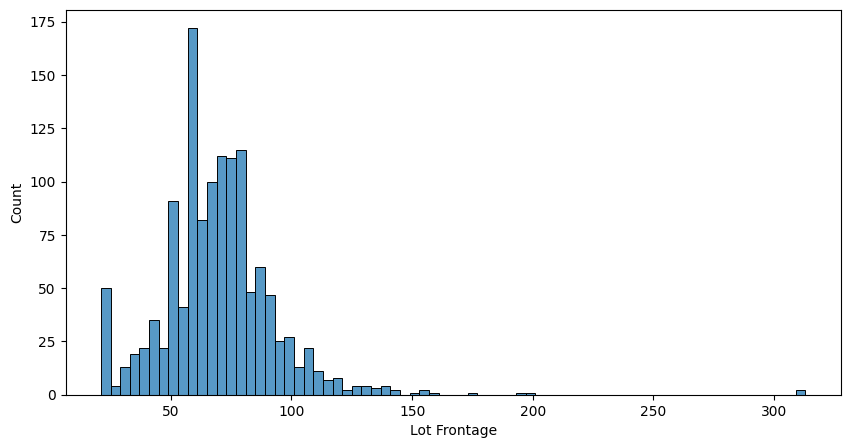

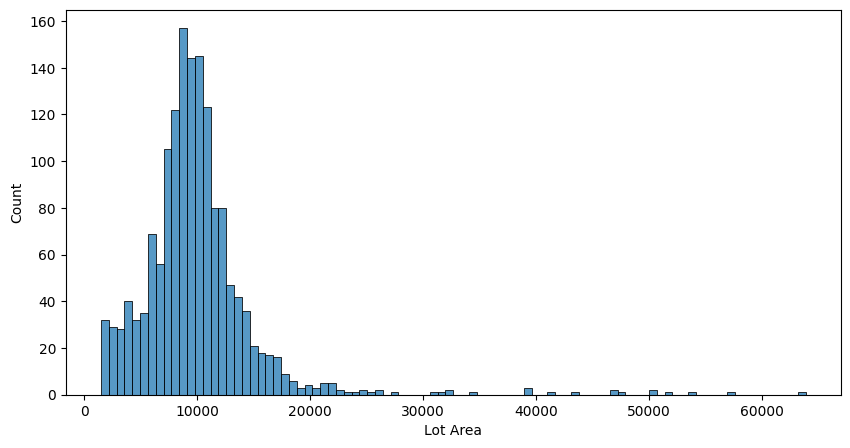

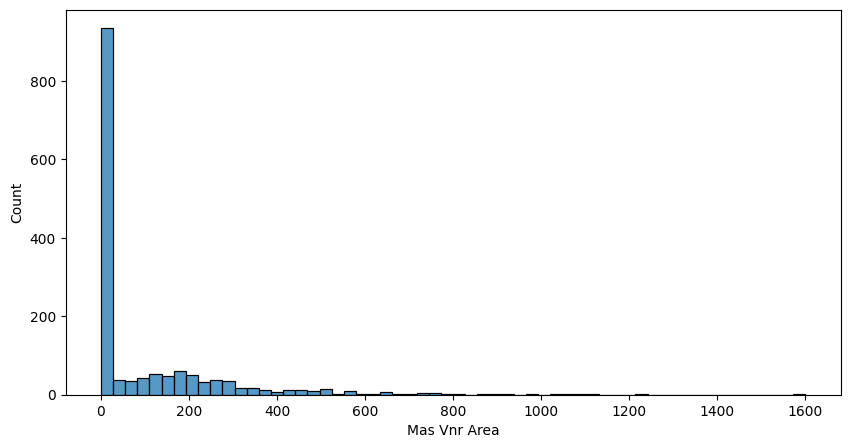

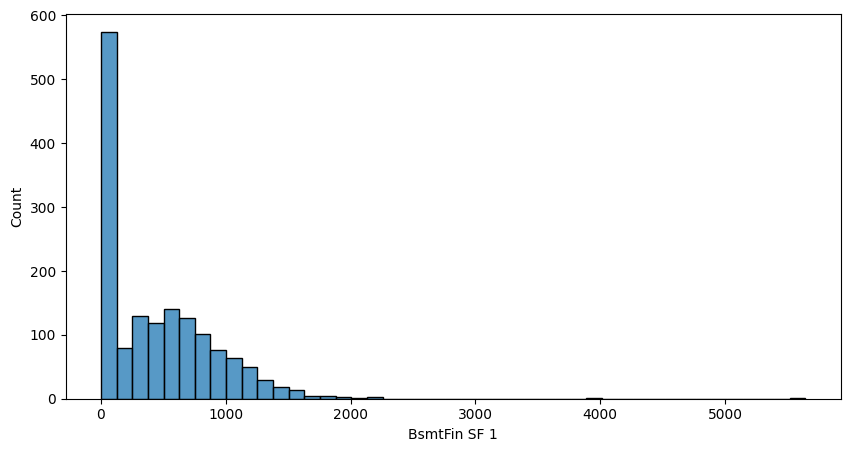

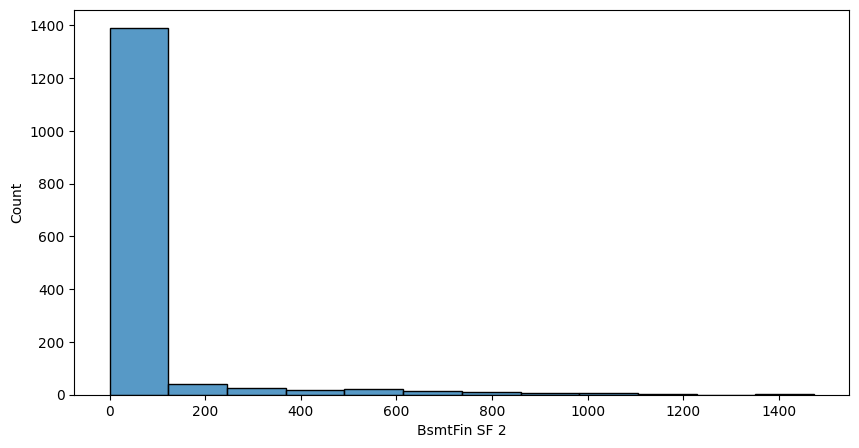

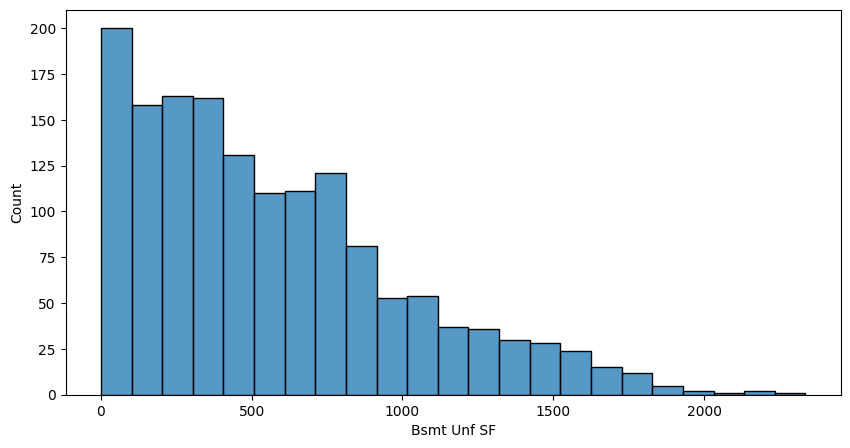

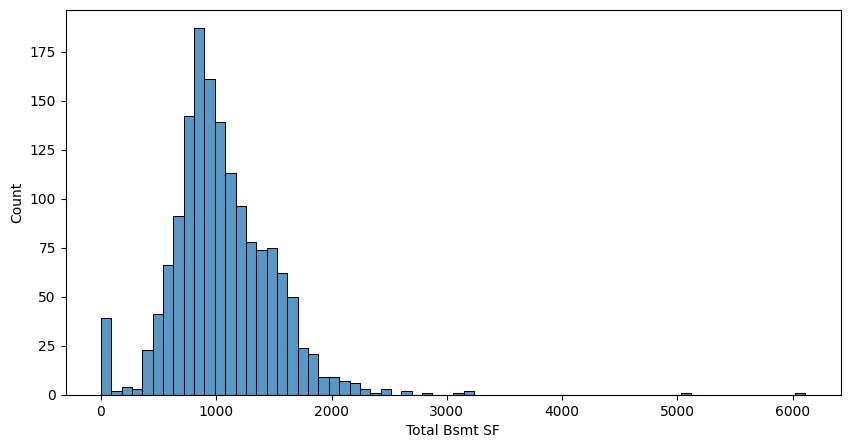

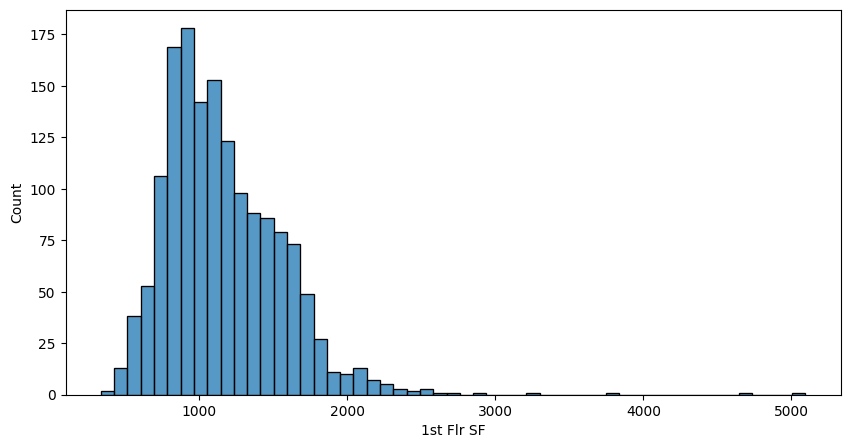

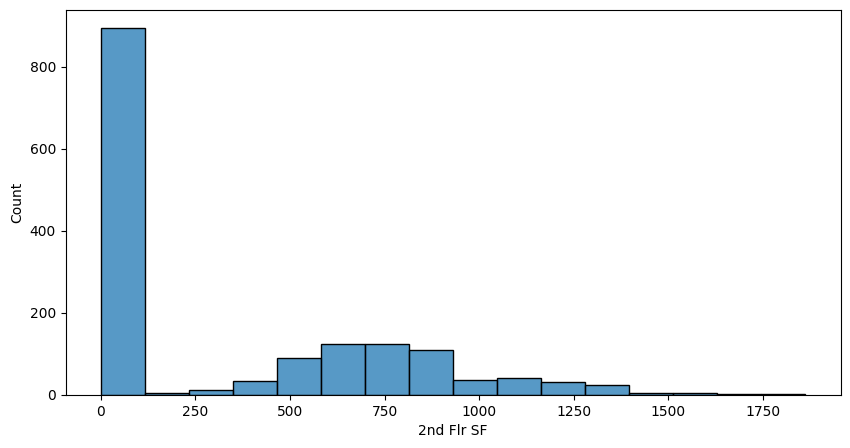

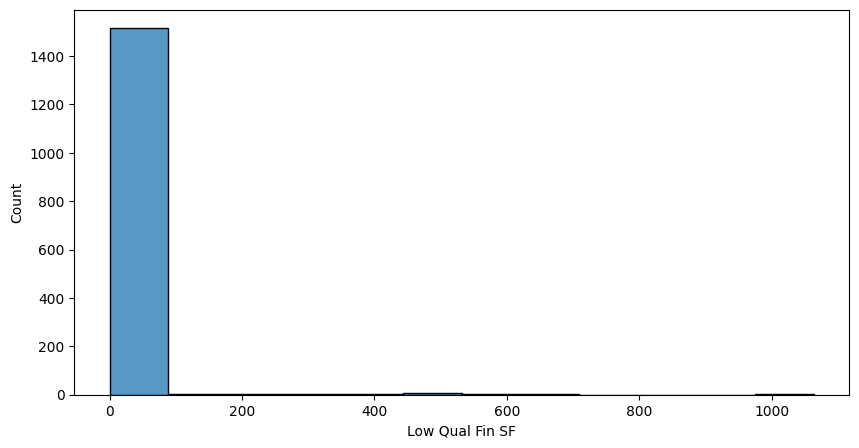

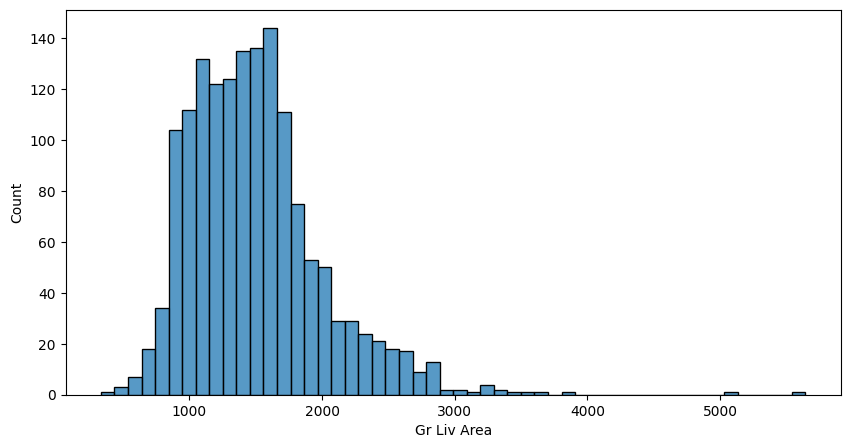

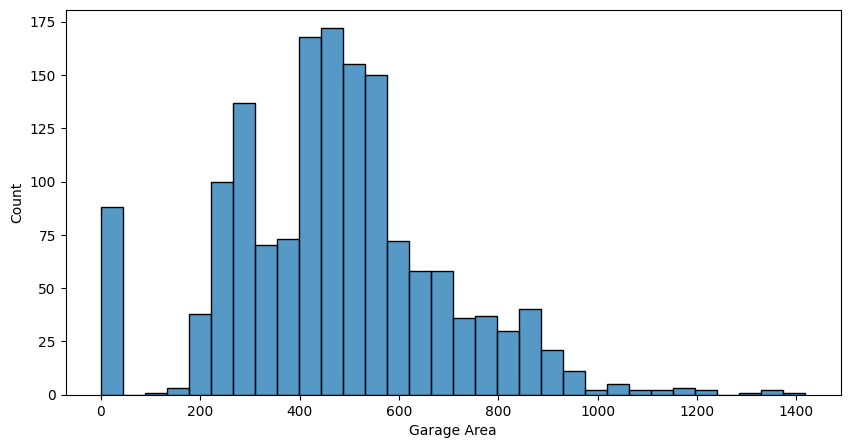

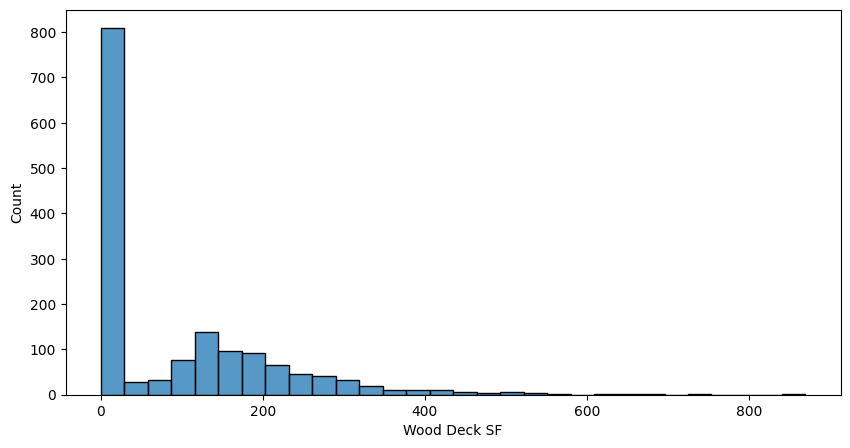

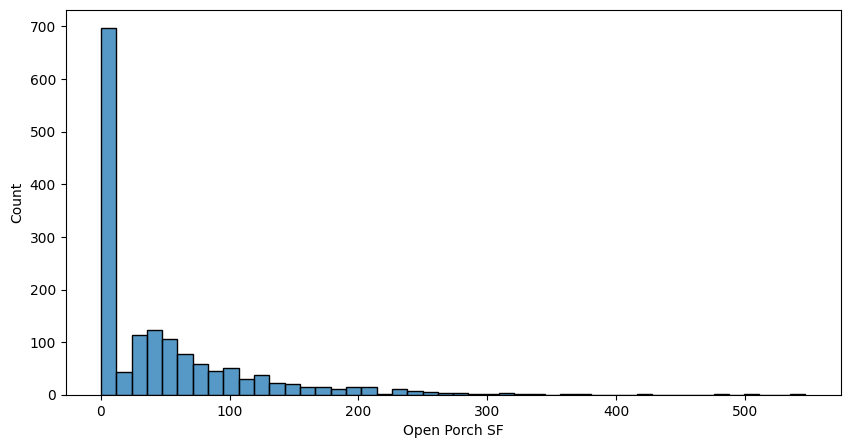

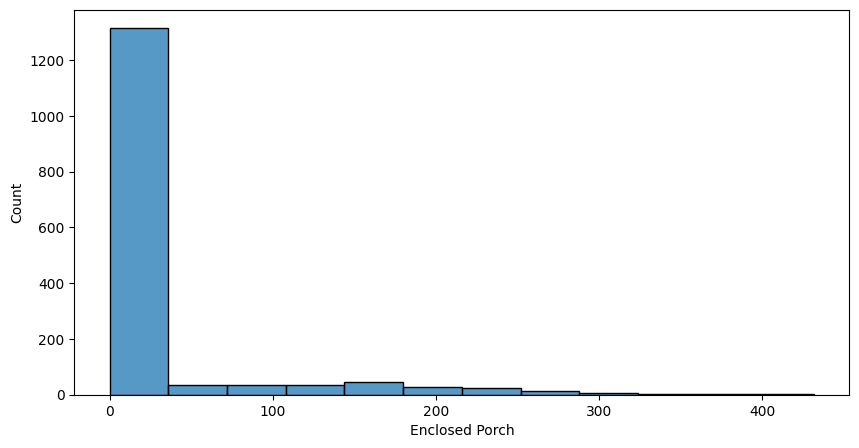

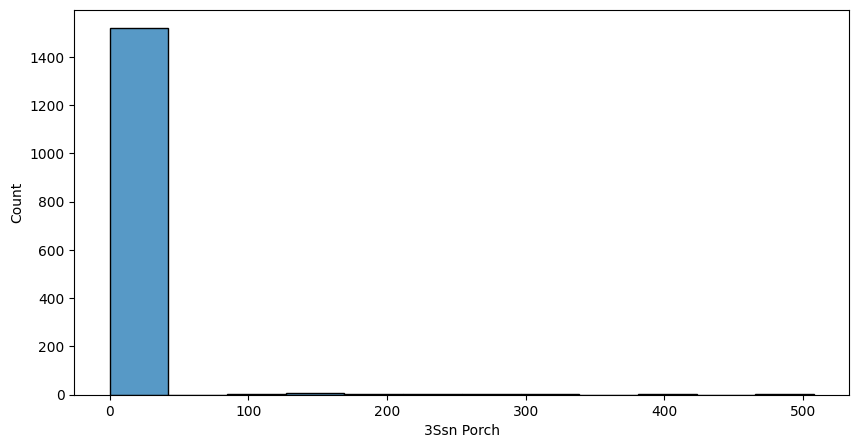

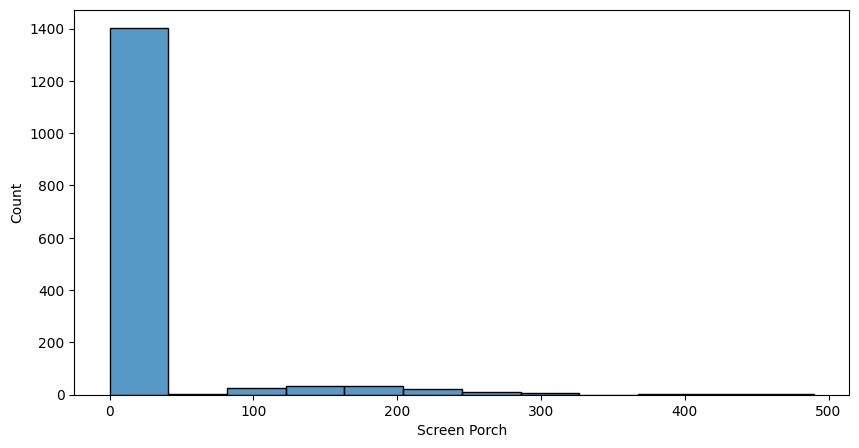

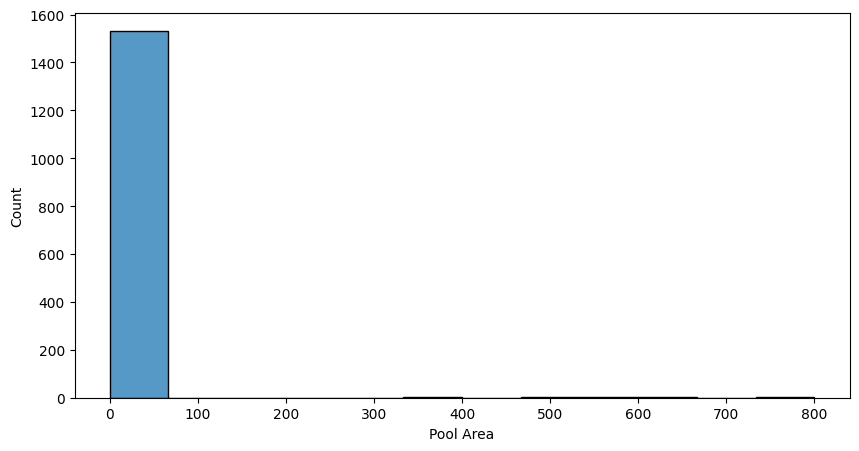

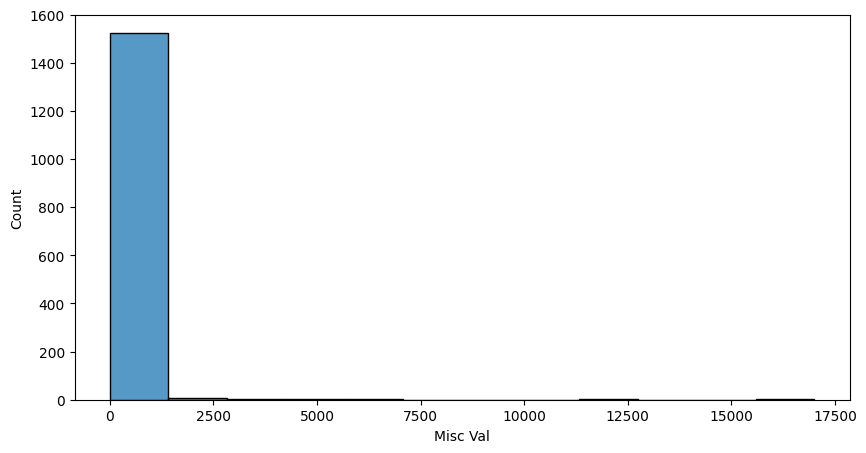

In [225]:
# Plotting histogram of each numeric column
for i in cols_numeric:
    plt.figure(figsize=(10, 5))
    sns.histplot(x=i, data=train)
    plt.show()

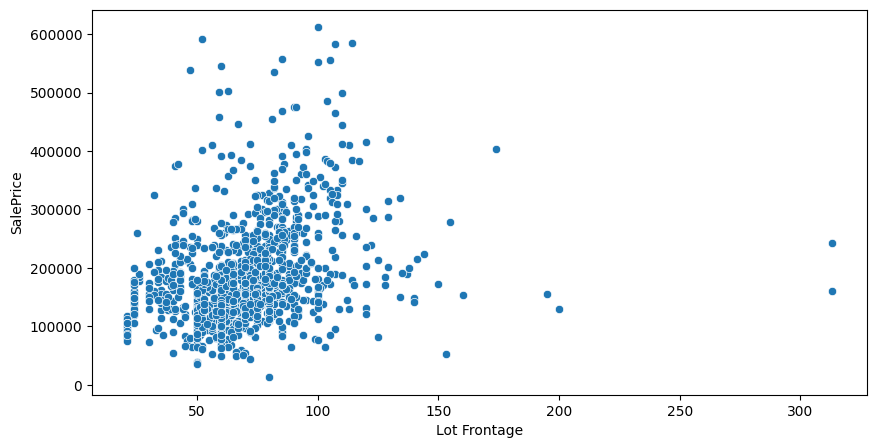

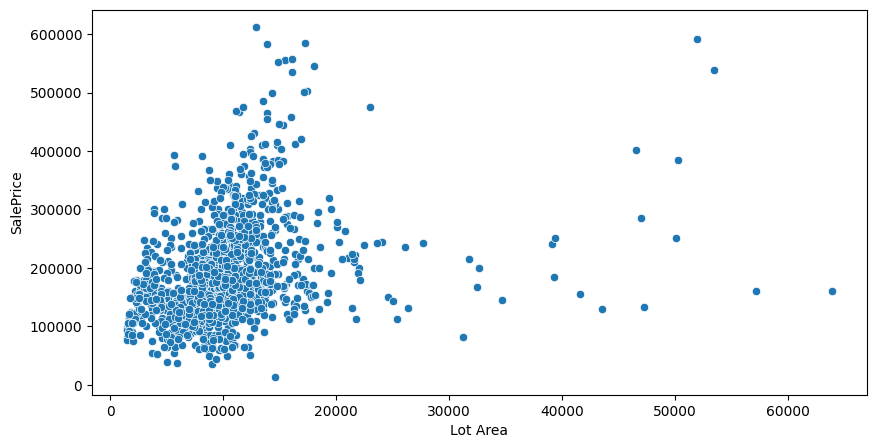

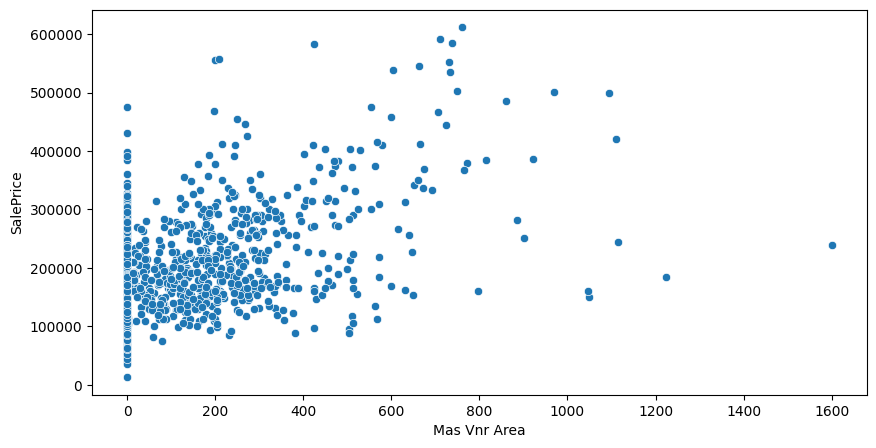

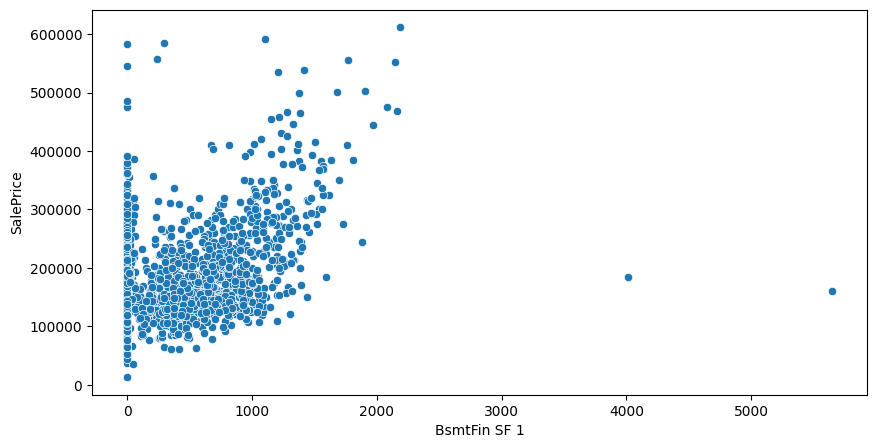

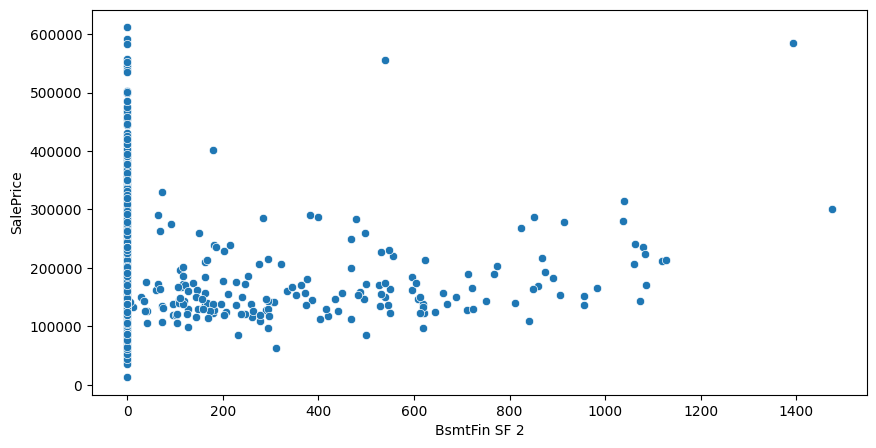

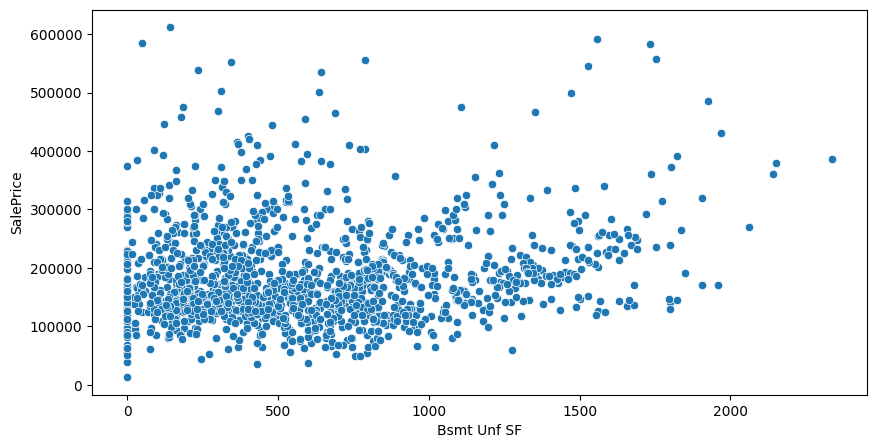

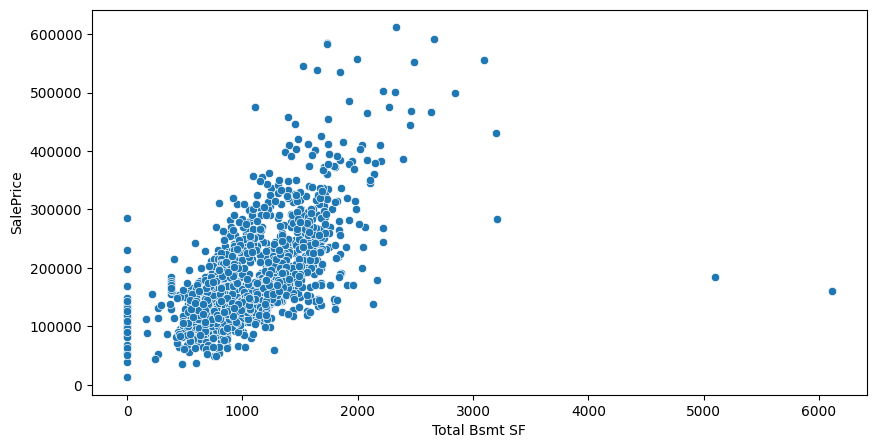

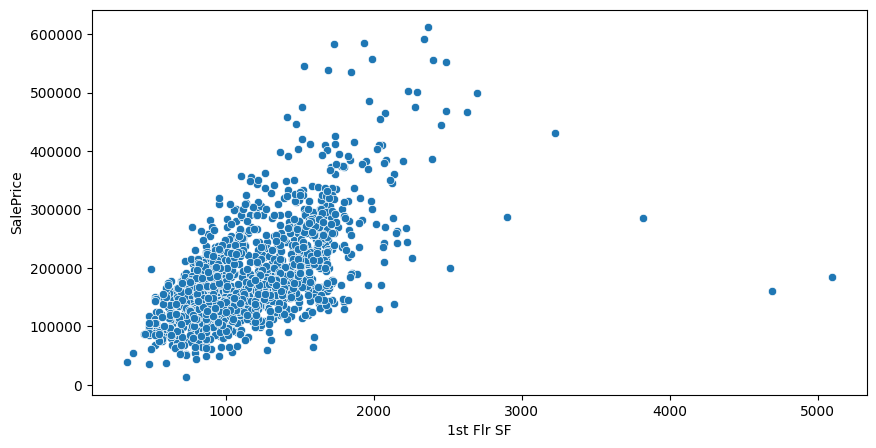

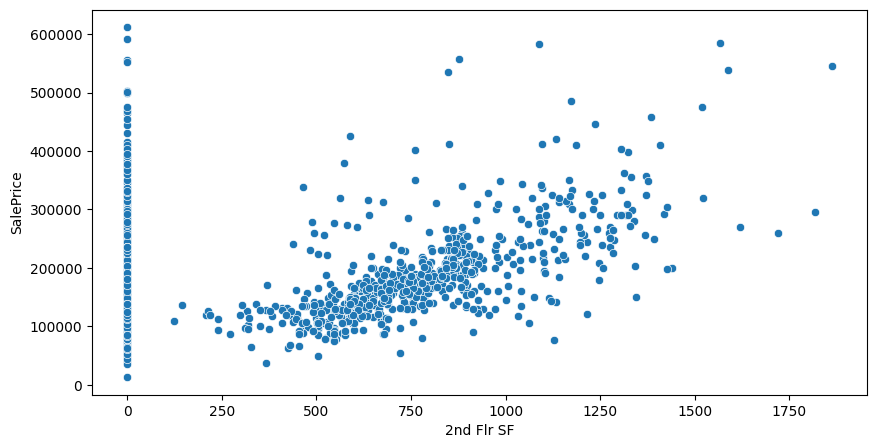

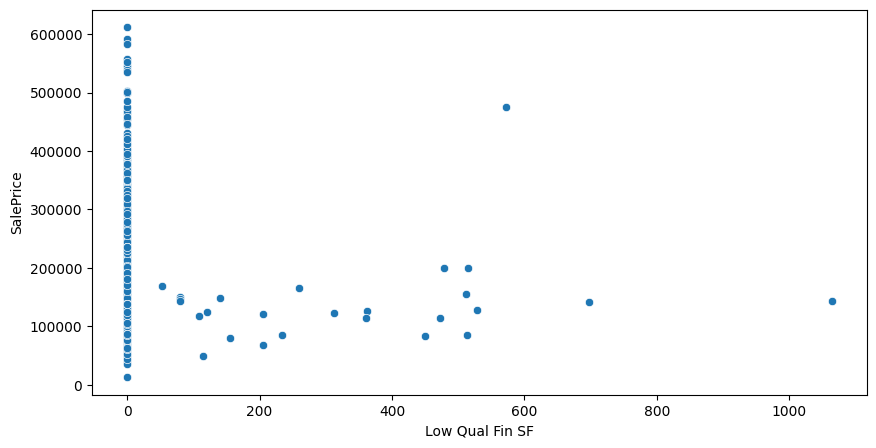

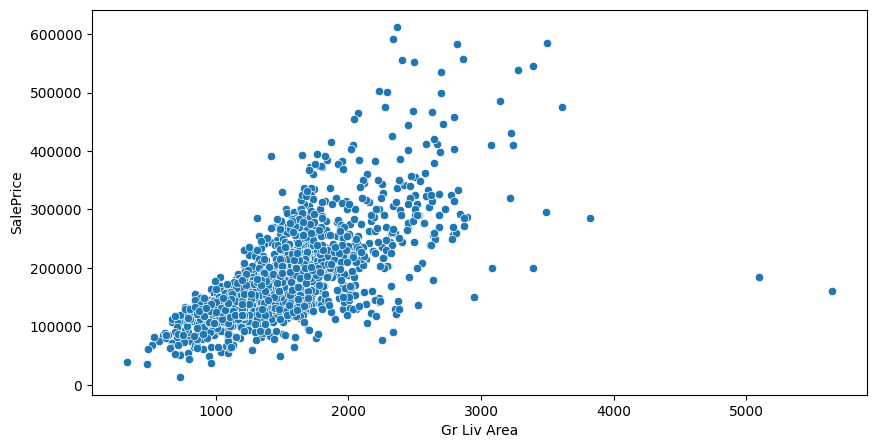

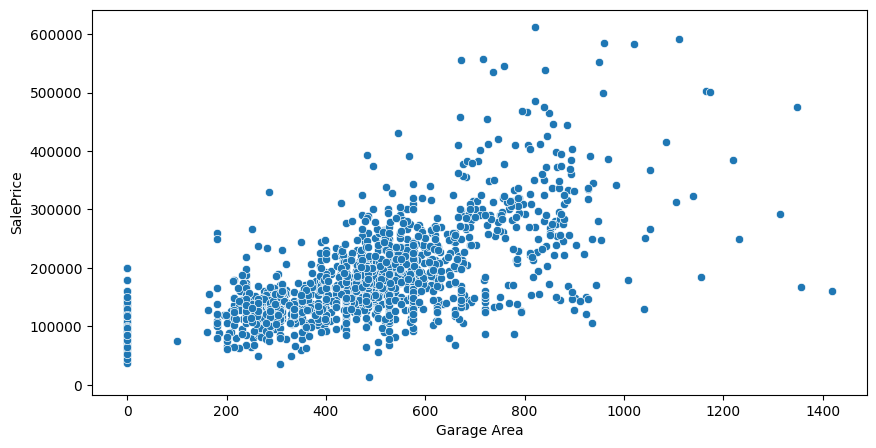

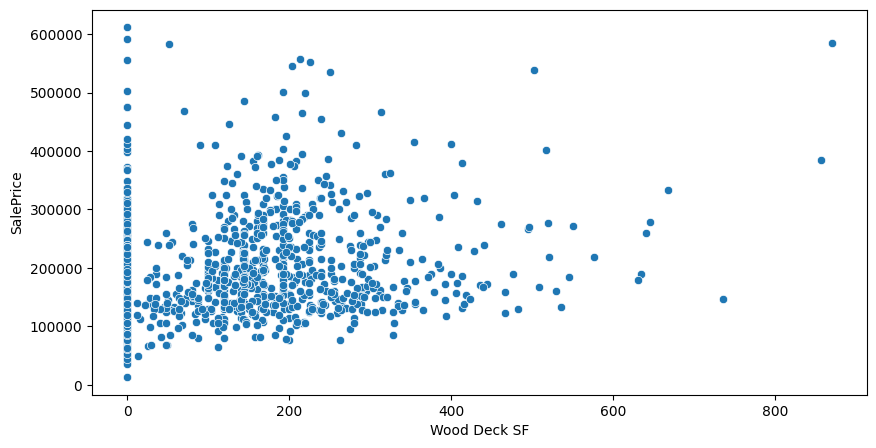

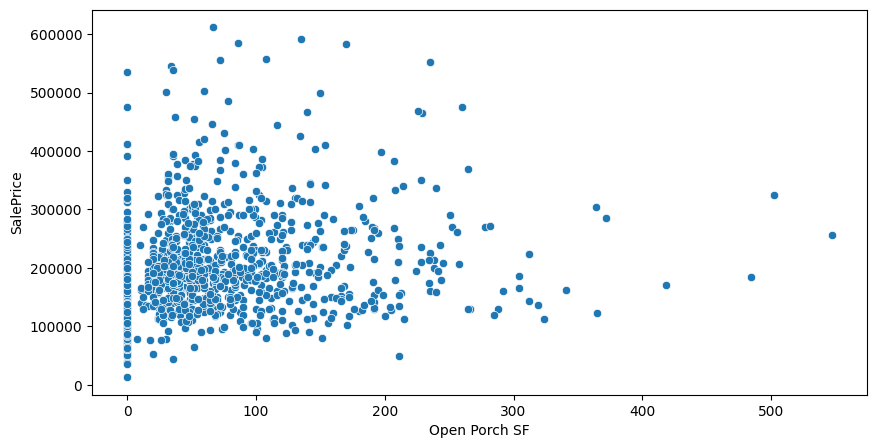

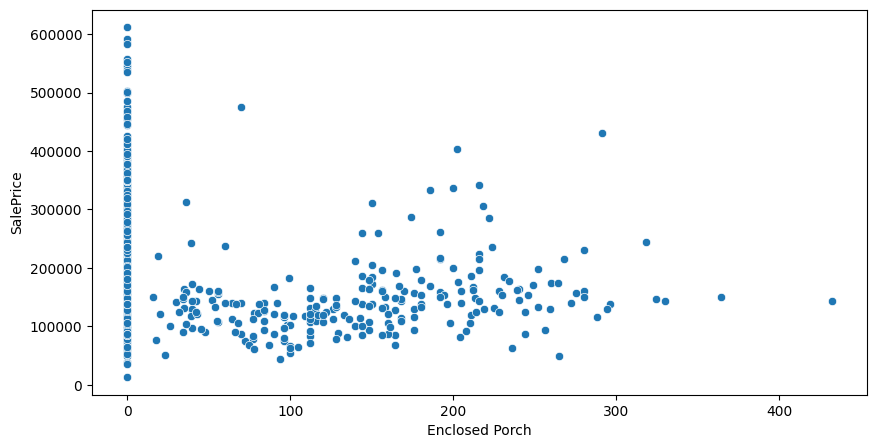

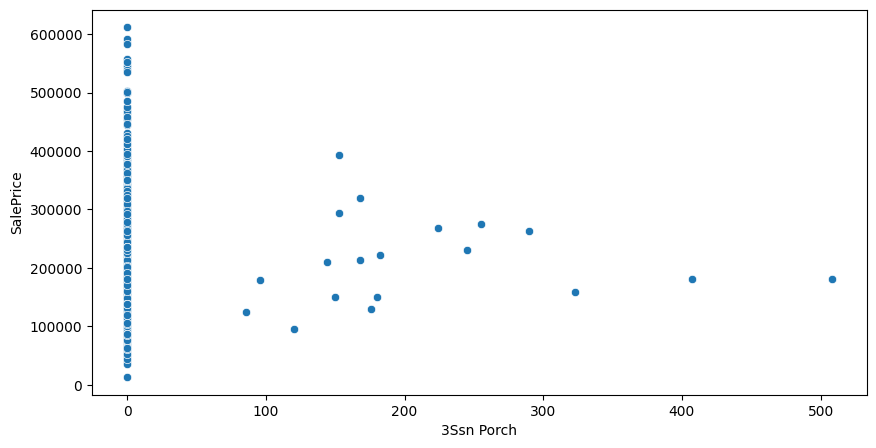

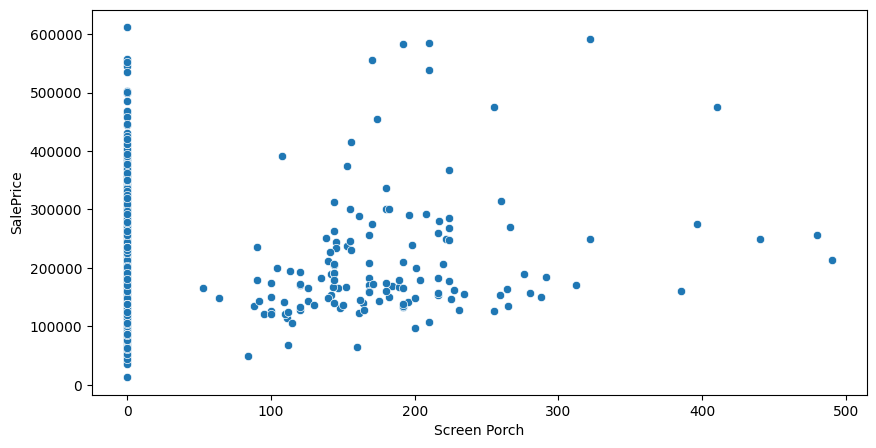

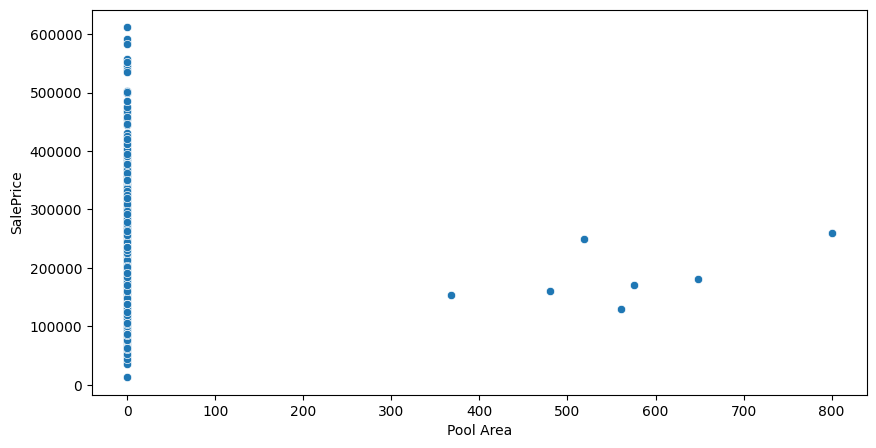

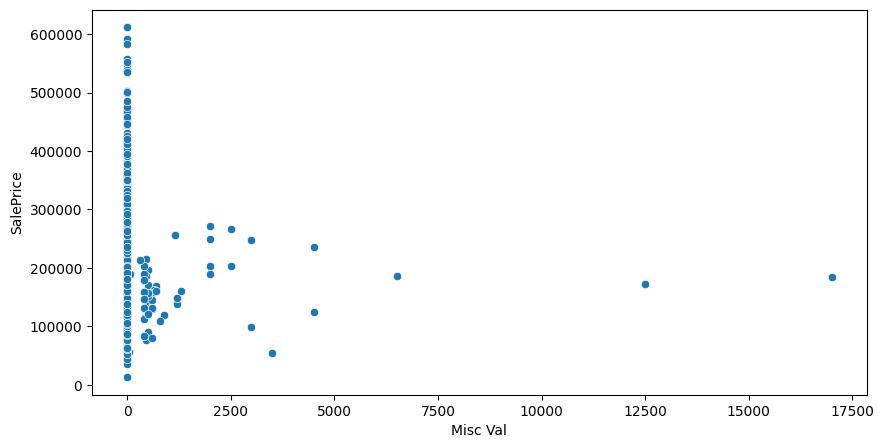

In [226]:
# Plotting scatterplot between numeric cols and target variable (SalePrice)
for i in cols_numeric:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=i, y='SalePrice', data=train)
    plt.show()

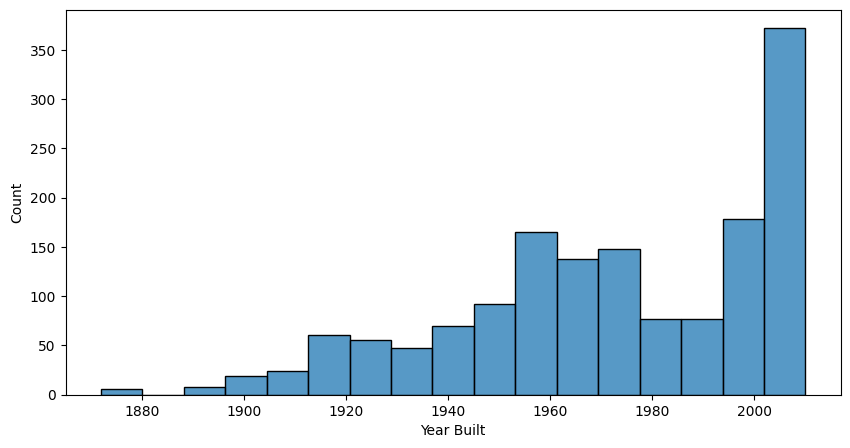

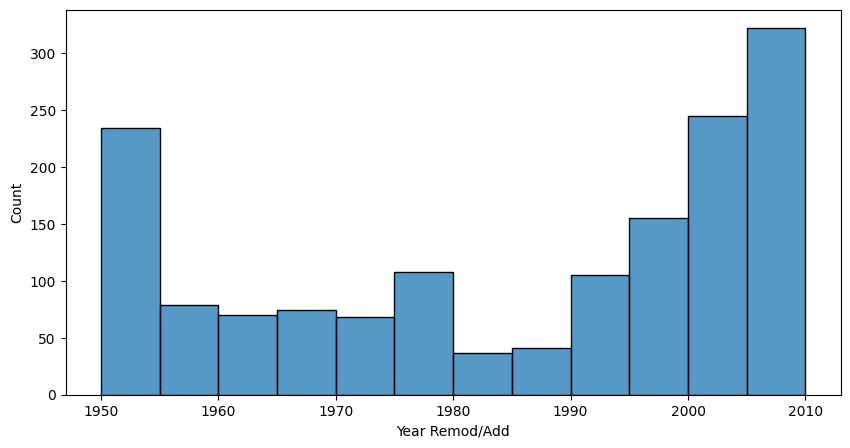

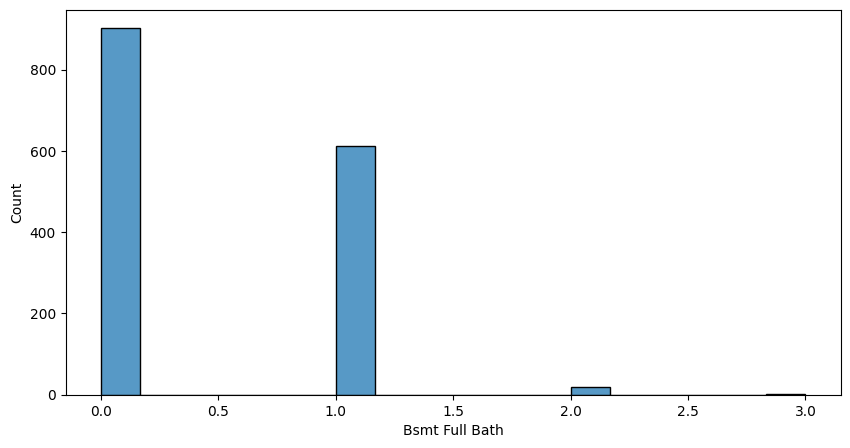

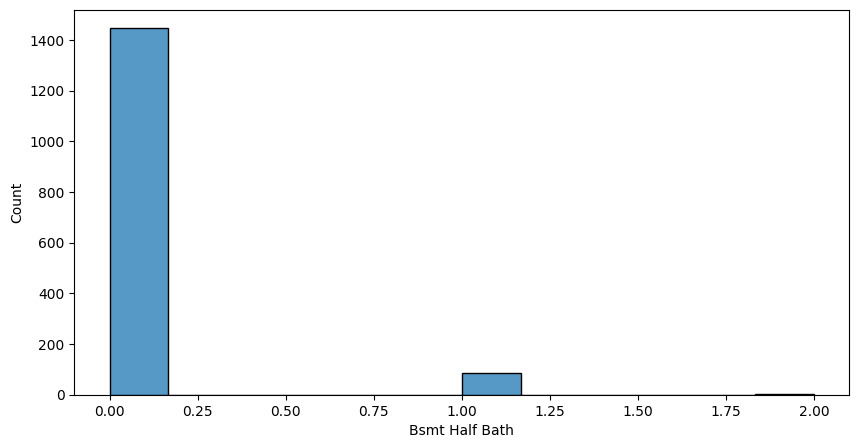

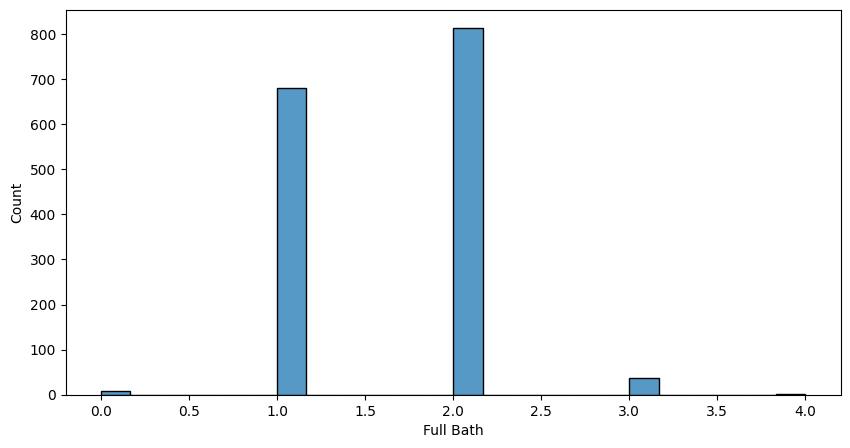

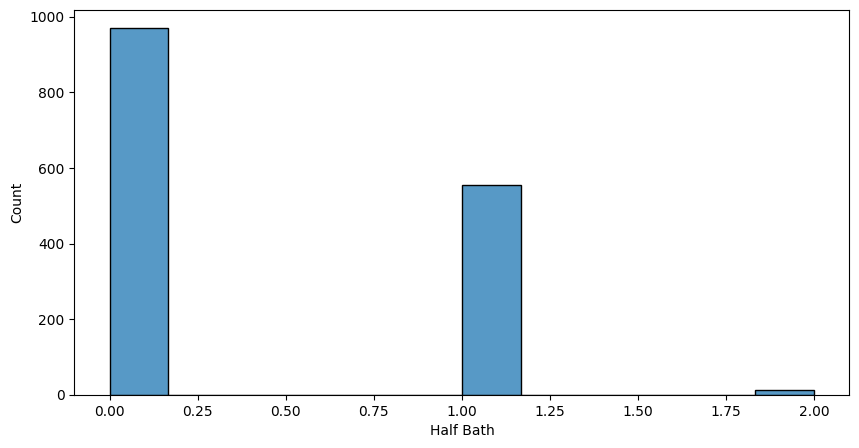

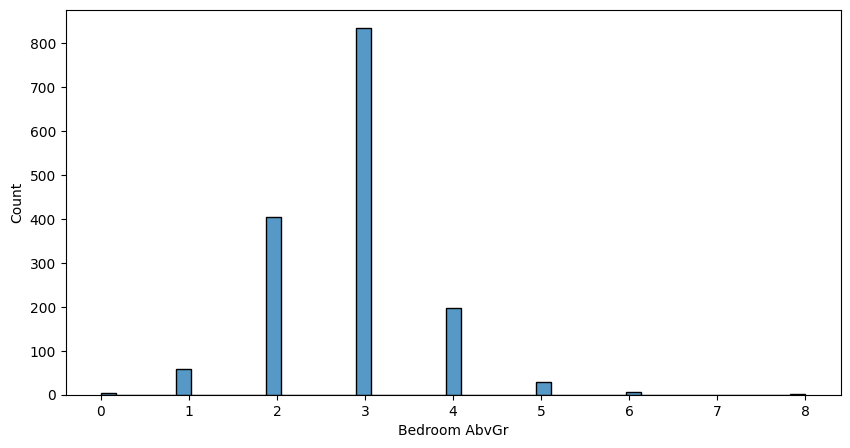

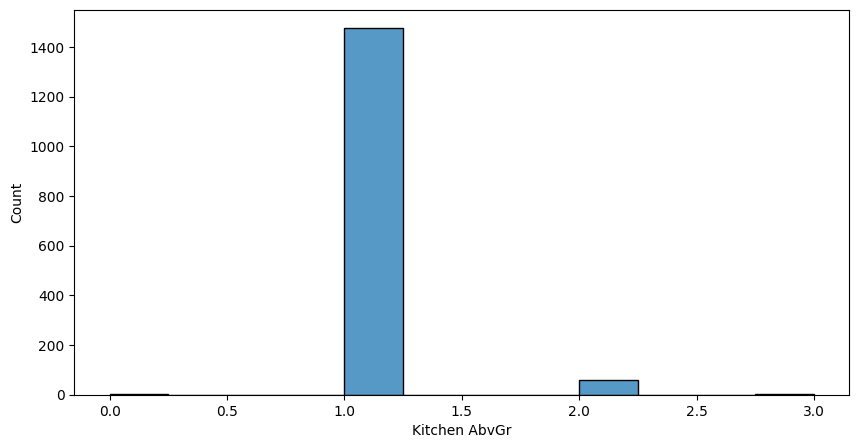

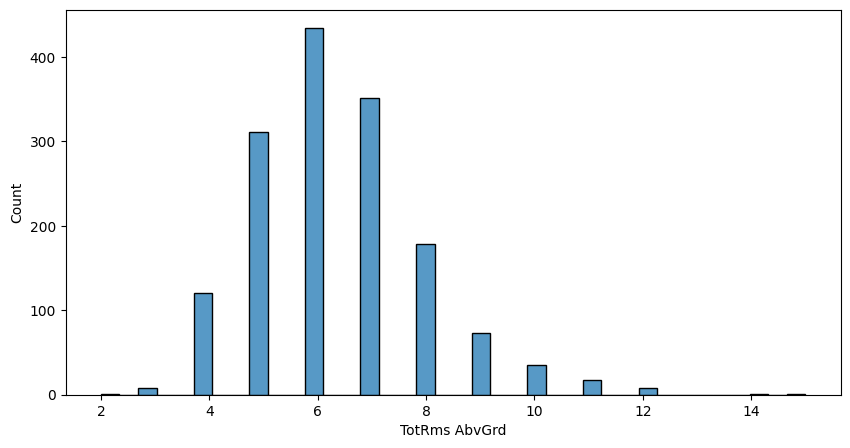

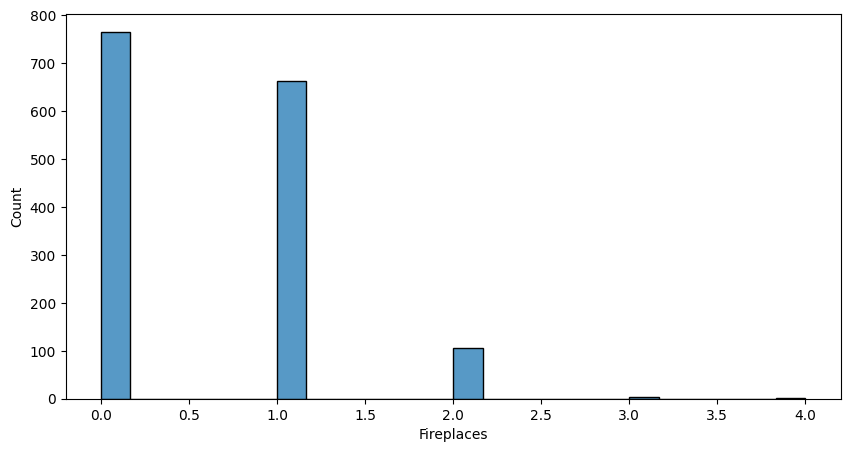

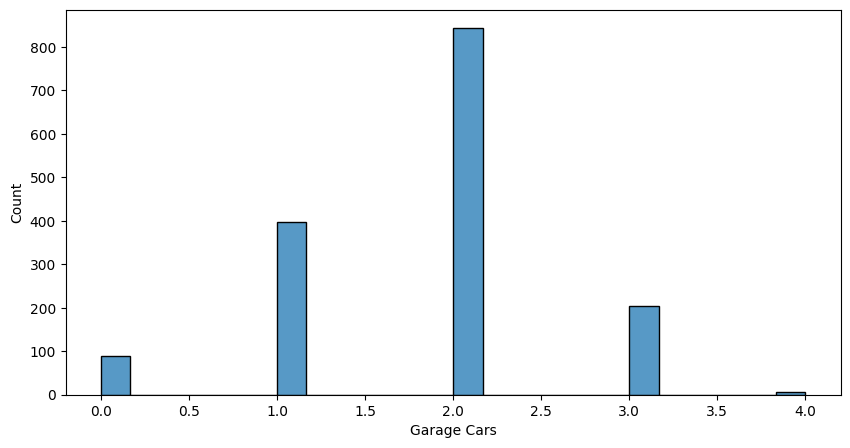

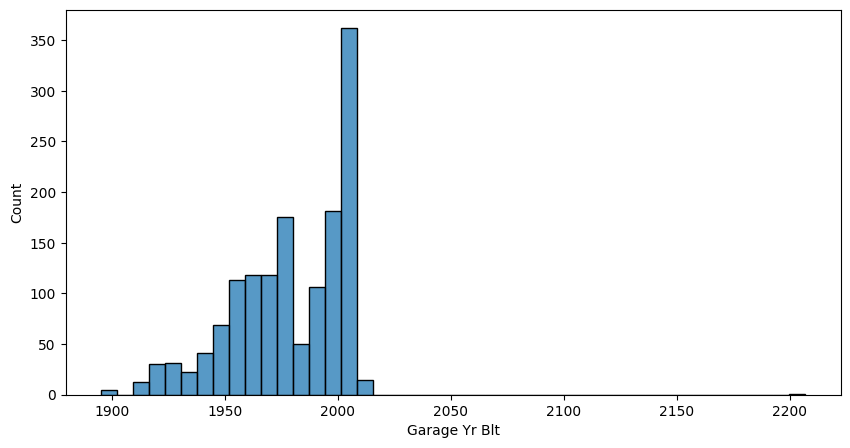

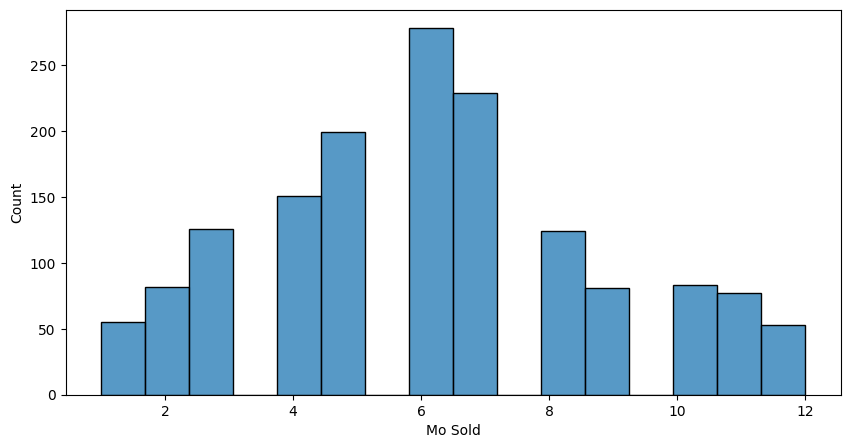

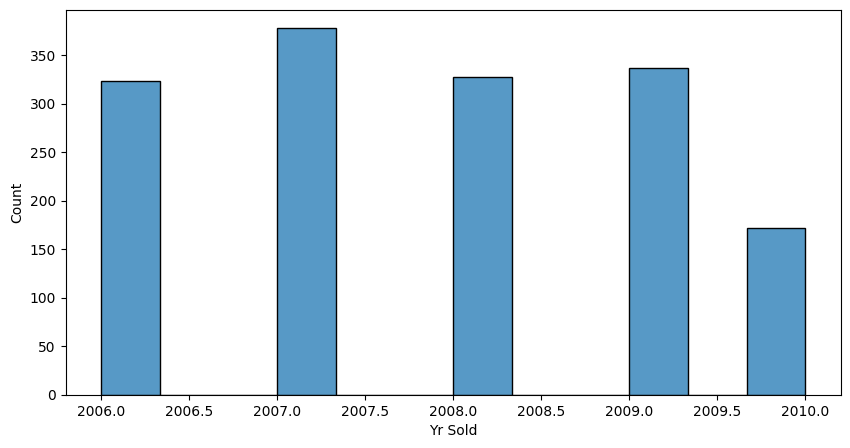

In [227]:
# Histogram of discrete variables
for i in cols_discrete:
    plt.figure(figsize=(10, 5))
    sns.histplot(x=i, data=train)
    plt.show()

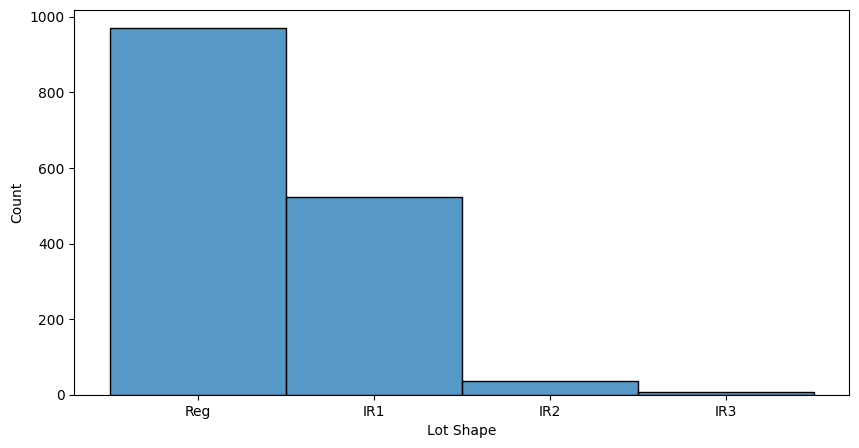

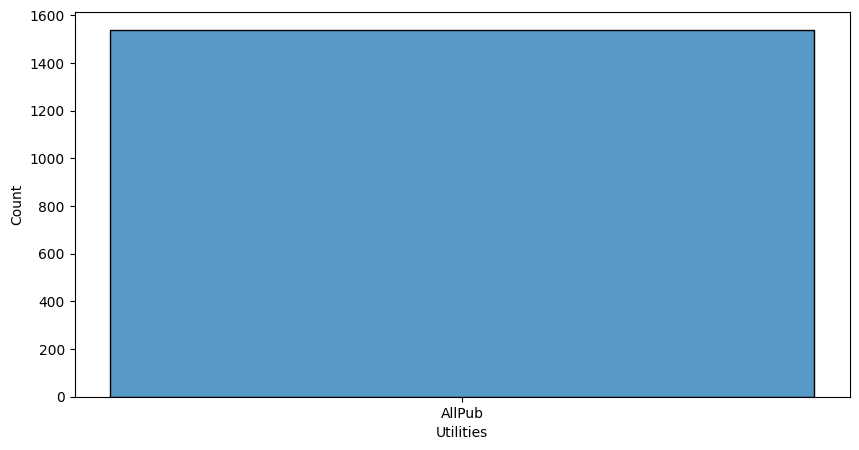

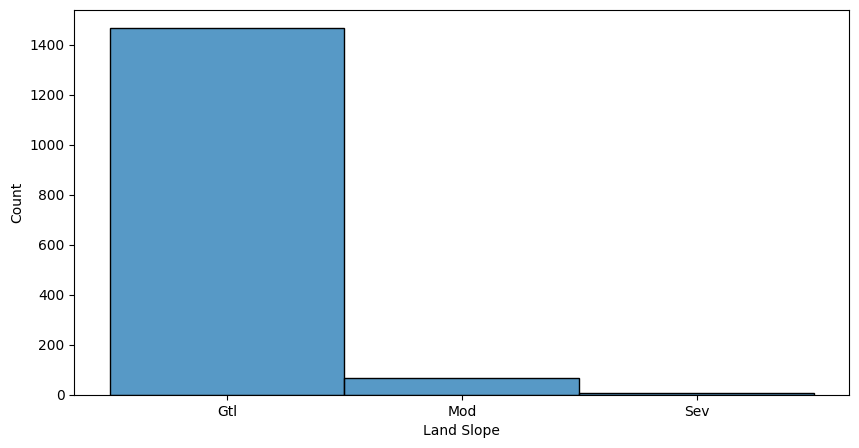

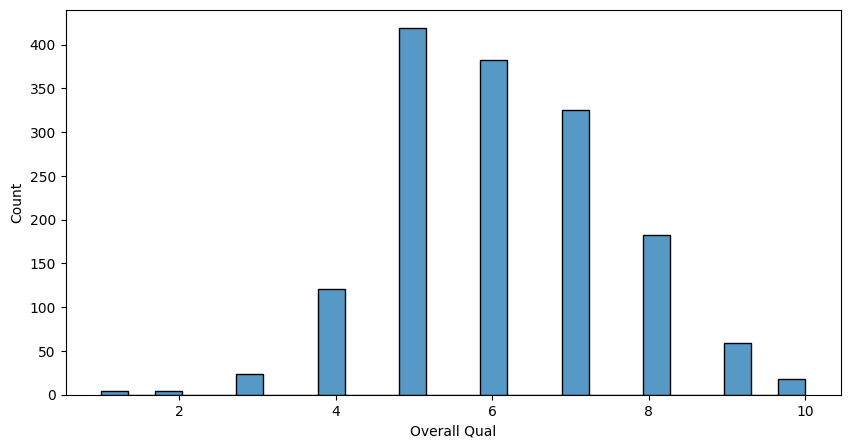

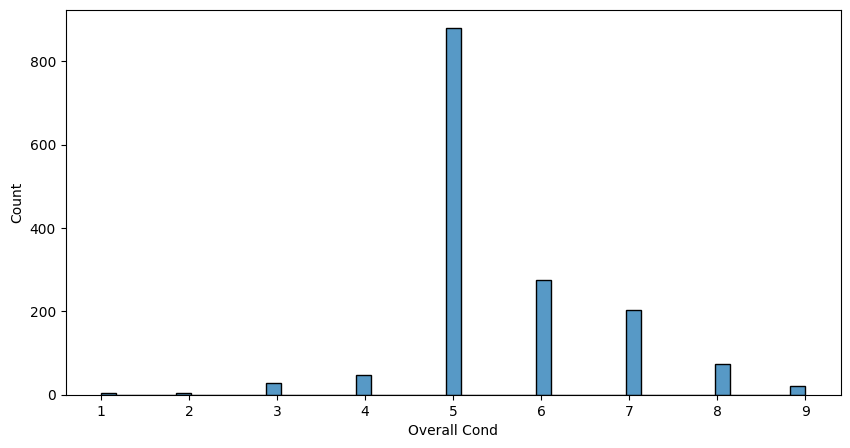

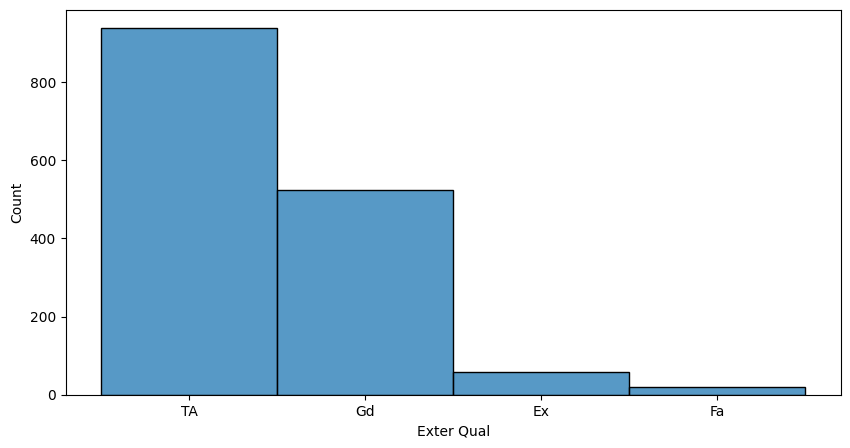

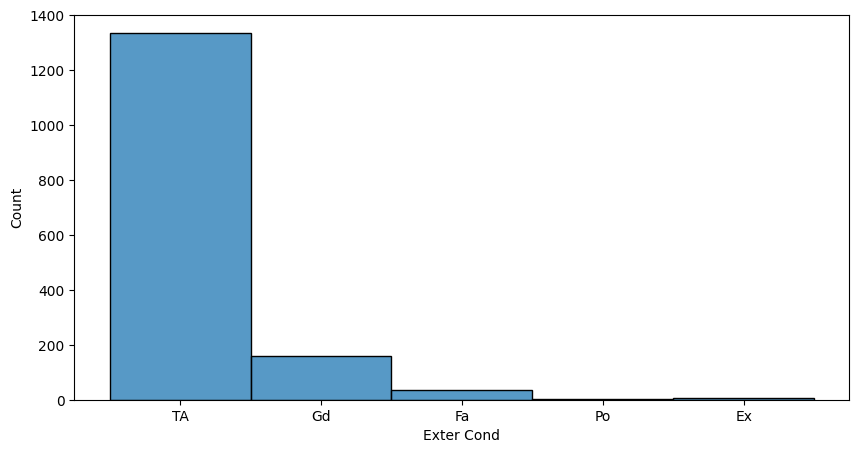

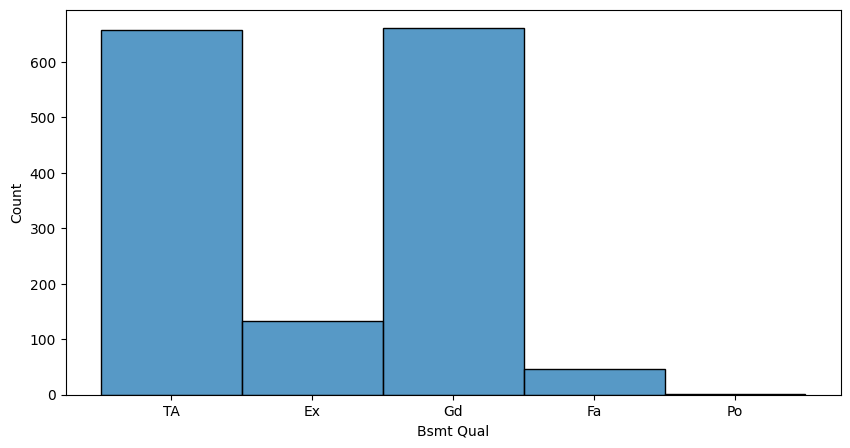

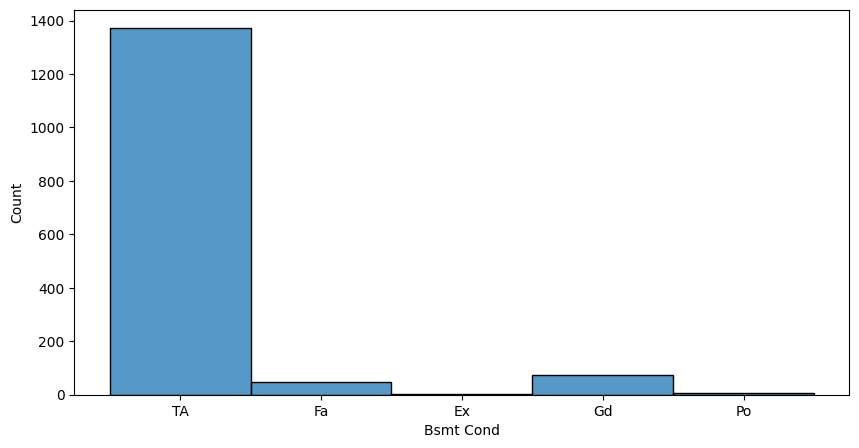

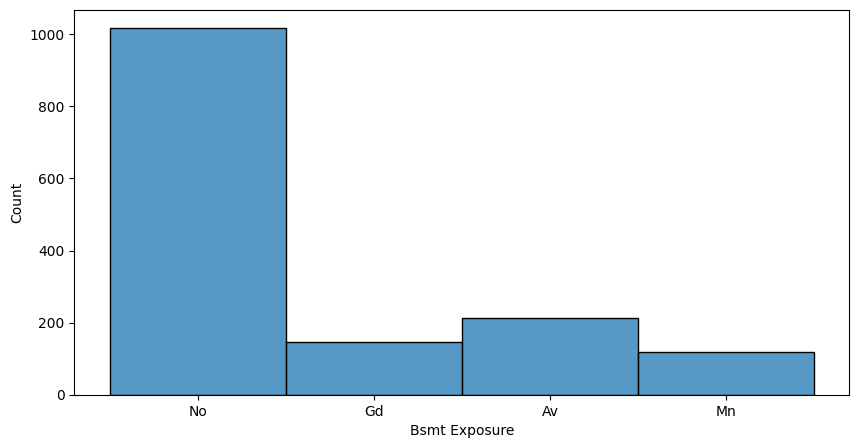

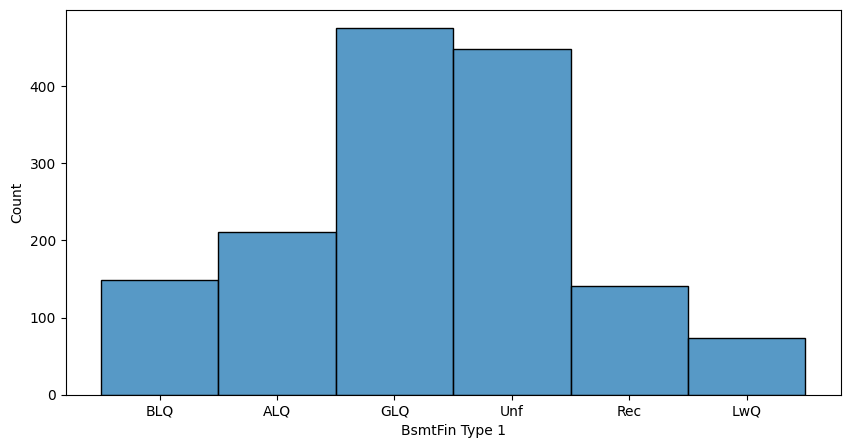

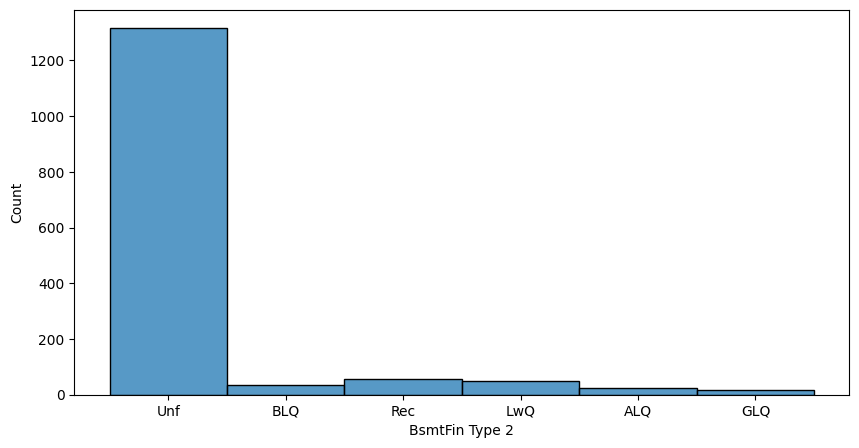

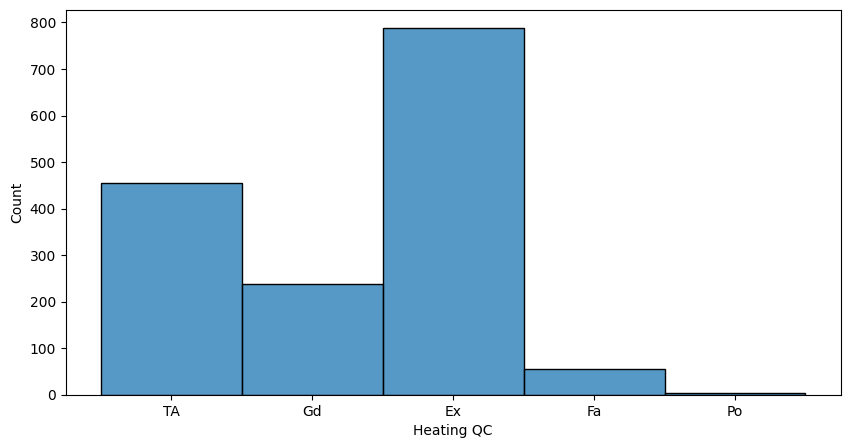

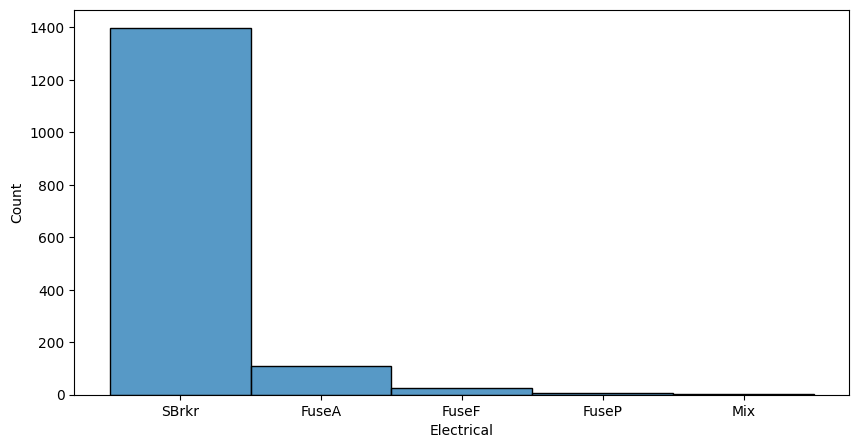

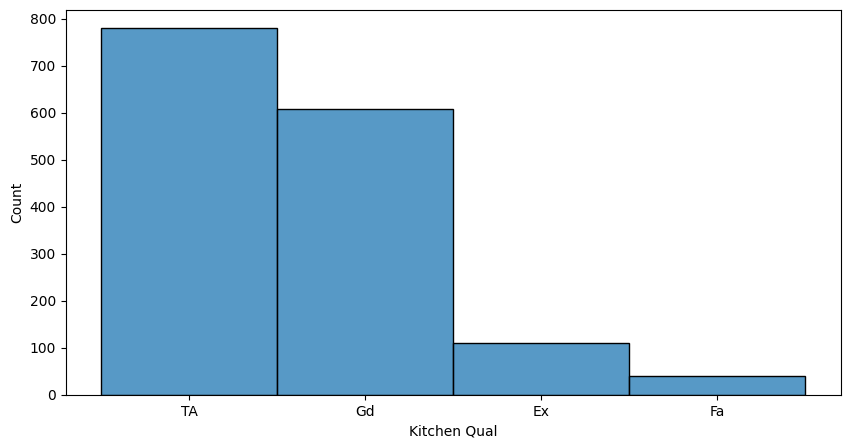

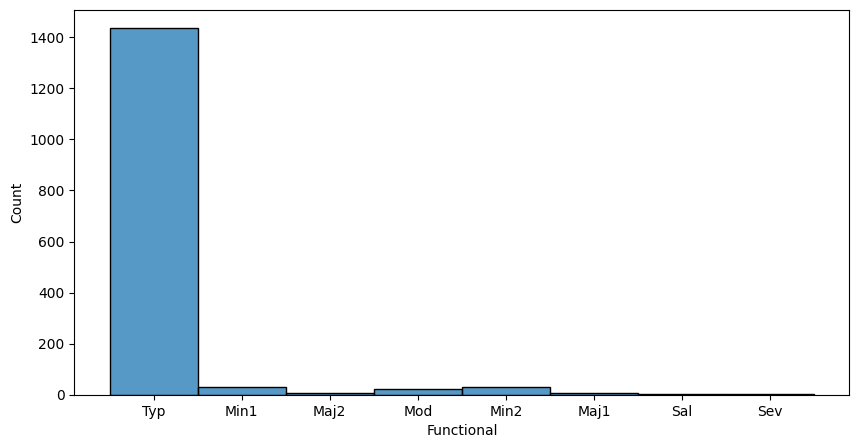

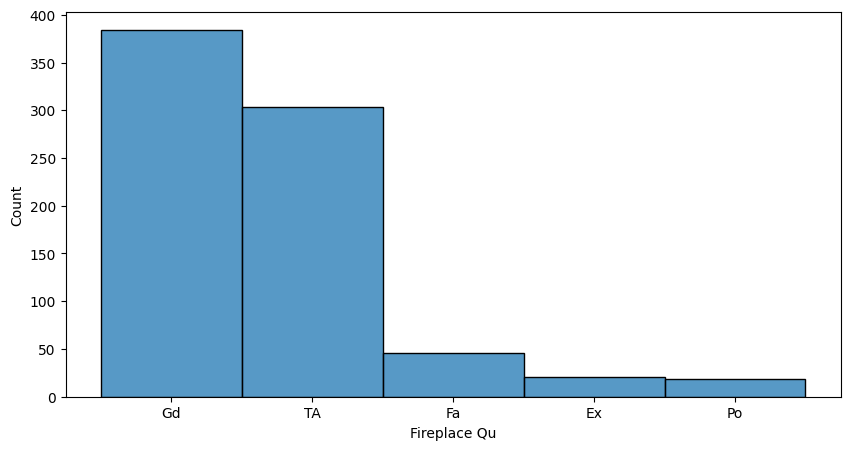

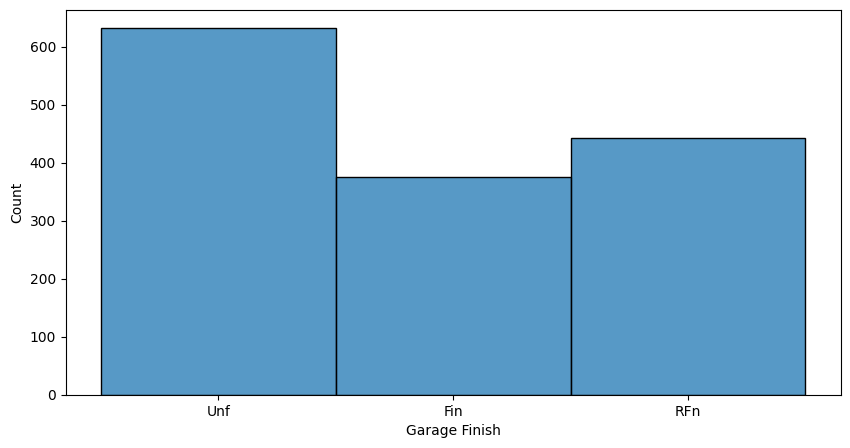

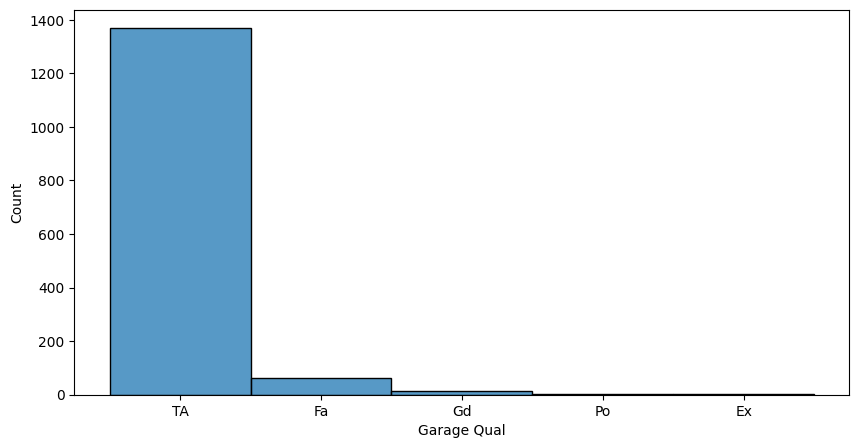

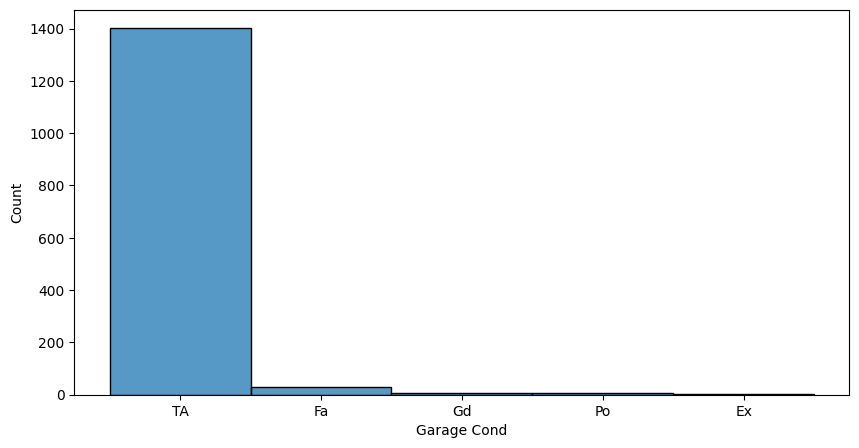

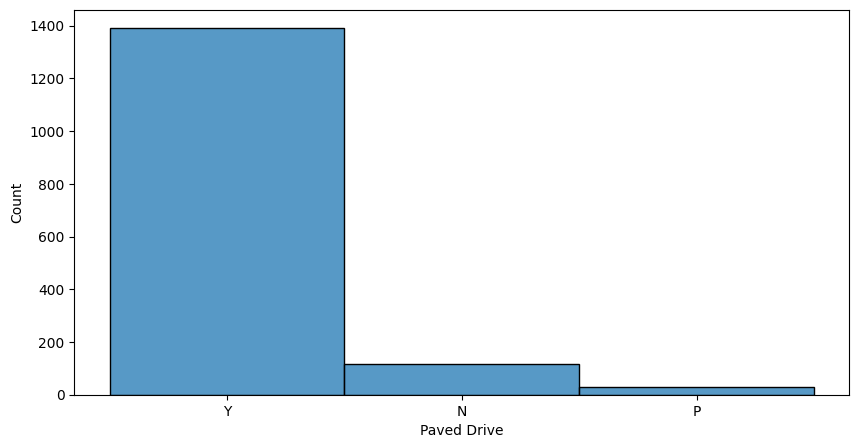

In [228]:
# Histogram of ordinal variables
for i in cols_ordinal:
    plt.figure(figsize=(10, 5))
    sns.histplot(x=i, data=train)
    plt.show()

In [229]:
# Removing outlier from the data
train = train[train['Gr Liv Area'] <= 4000]

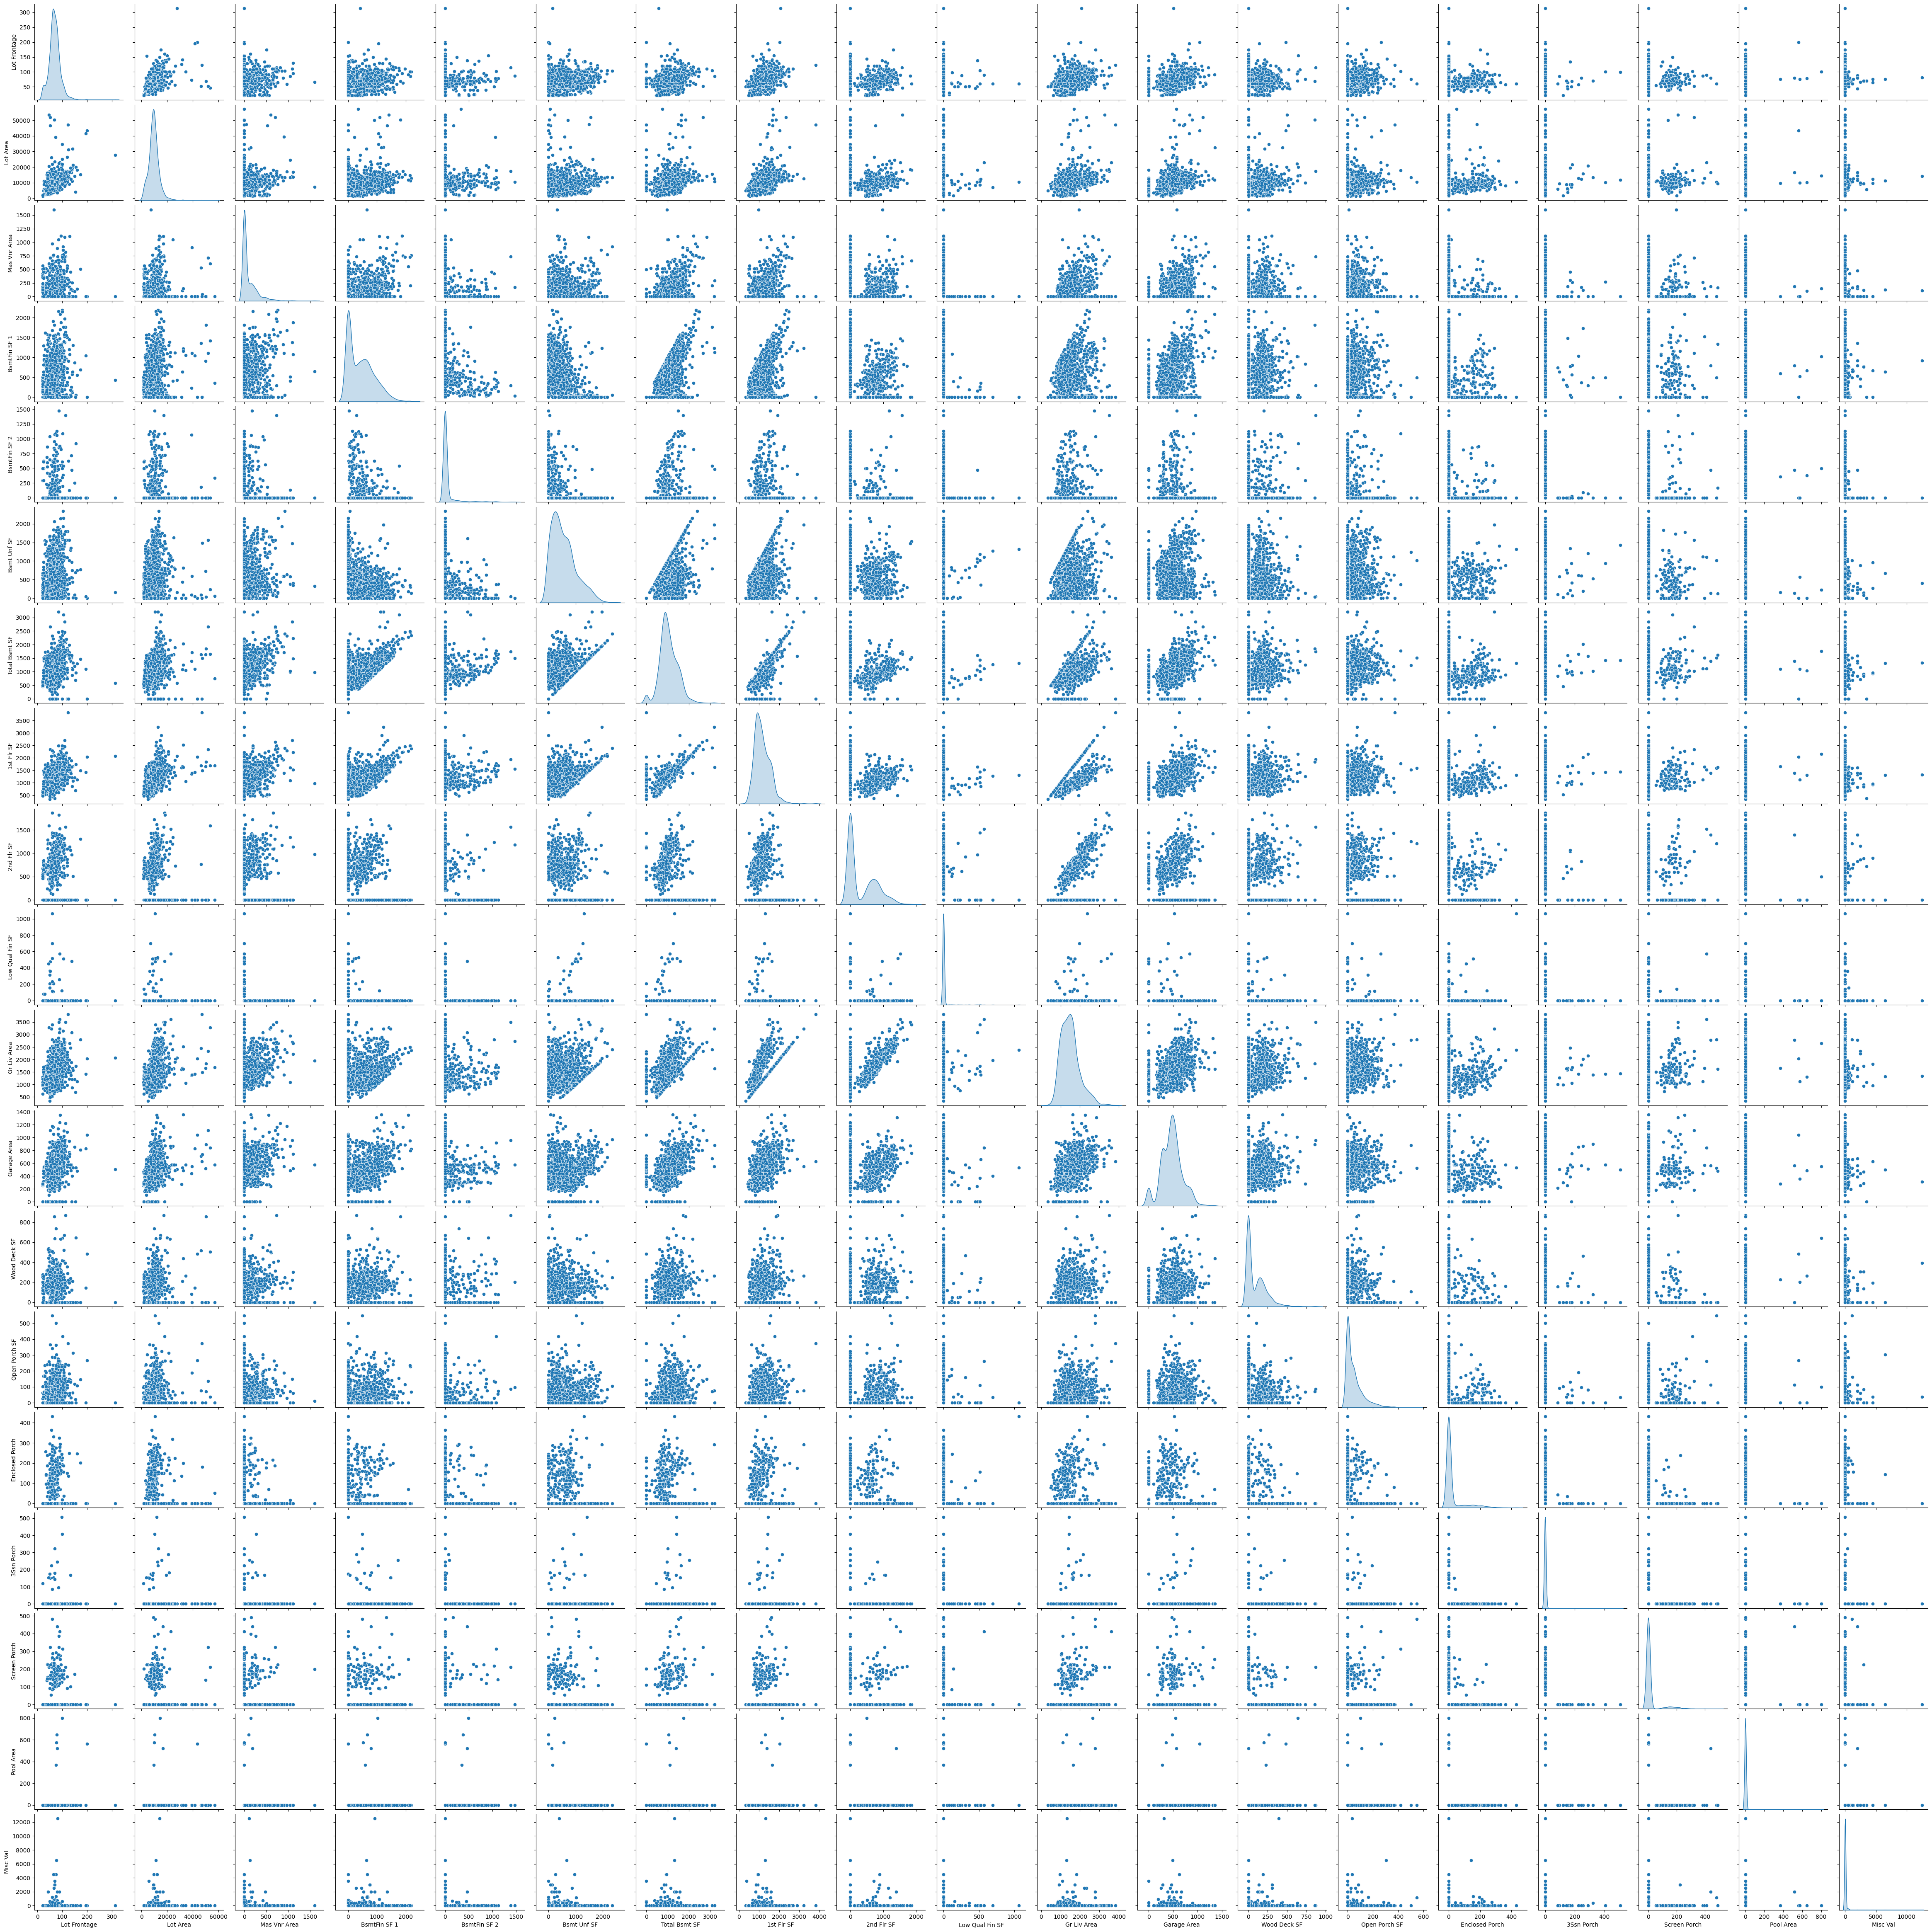

In [230]:
sns.pairplot(train[cols_numeric], diag_kind='kde')

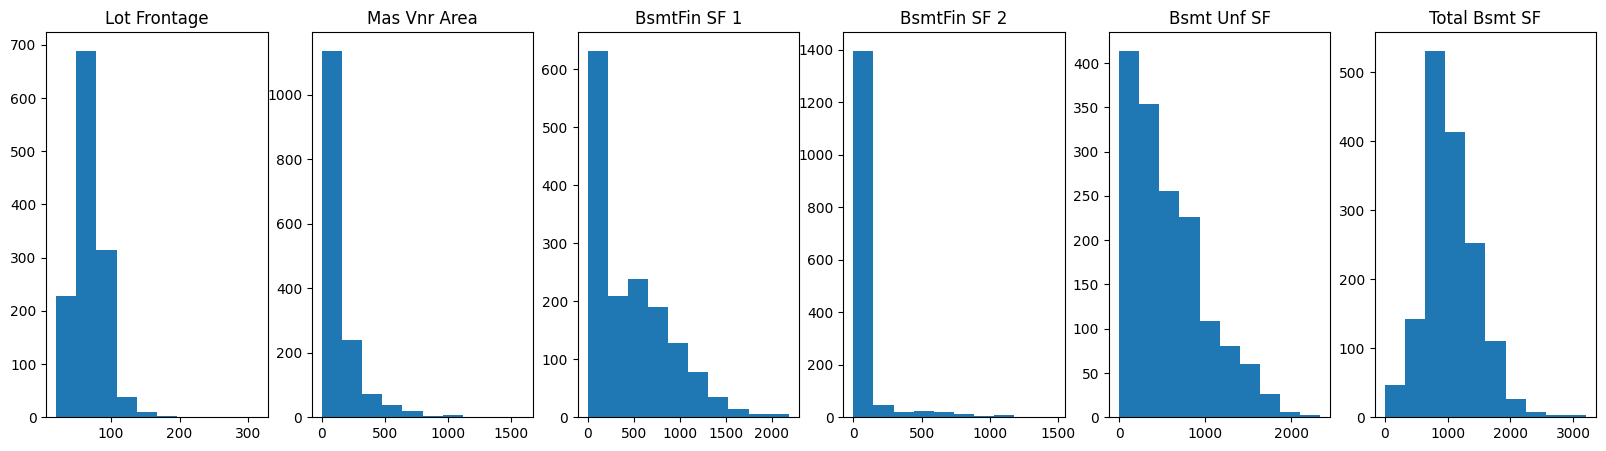

In [231]:
# Finding distribution of numeric columns that have missing values to understand how to impute
missing_cols_numeric = [x for x in cols_numeric if train[x].isnull().sum() > 0]
fig, ax = plt.subplots(1, len(missing_cols_numeric), figsize=(20, 5))
for idx, col in enumerate(missing_cols_numeric):
    ax[idx].hist(train[col])
    ax[idx].set_title(col)

In [232]:
# Imputing median into missing values of train and test data
for i in missing_cols_numeric:
    train[i] = train[i].fillna(train[i].median())
    test[i] = test[i].fillna(test[i].median())

# Garage Area is a continuous column that has 1 missing value in test data only, which will be imputed with median as well
test['Garage Area'] = test['Garage Area'].fillna(test['Garage Area'].median())

In [233]:
# Checking for null values in discrete columns of train
train[cols_discrete].isna().sum().sort_values(ascending=False)

Garage Yr Blt     88
Bsmt Full Bath     2
Bsmt Half Bath     2
Year Built         0
Year Remod/Add     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Mo Sold            0
Yr Sold            0
dtype: int64

In [234]:
# If garage year built is null, what is the garage area?
train[train['Garage Yr Blt'].isna()]['Garage Area']
# train[train['Garage Area'] == 0]['Garage Yr Blt']

25      0.0
32      0.0
39      0.0
50      0.0
62      0.0
       ... 
1483    0.0
1488    0.0
1497    0.0
1501    0.0
1509    0.0
Name: Garage Area, Length: 88, dtype: float64

In [235]:
# Checking for null values in discrete columns of test
test[cols_discrete].isna().sum().sort_values(ascending=False)

Garage Yr Blt     26
Garage Cars        1
Year Built         0
Year Remod/Add     0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Mo Sold            0
Yr Sold            0
dtype: int64

In [236]:
# Checking missing discrete values
test[cols_discrete].isna().sum().sort_values(ascending=False)

Garage Yr Blt     26
Garage Cars        1
Year Built         0
Year Remod/Add     0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Mo Sold            0
Yr Sold            0
dtype: int64

In [237]:
# Using mode of garage cars since garage cars is considered discrete categorical
print(test['Garage Cars'].mode())
test.loc[test['Garage Cars'].isna(), 'Garage Cars'] = 2

0    2.0
Name: Garage Cars, dtype: float64


<Axes: >

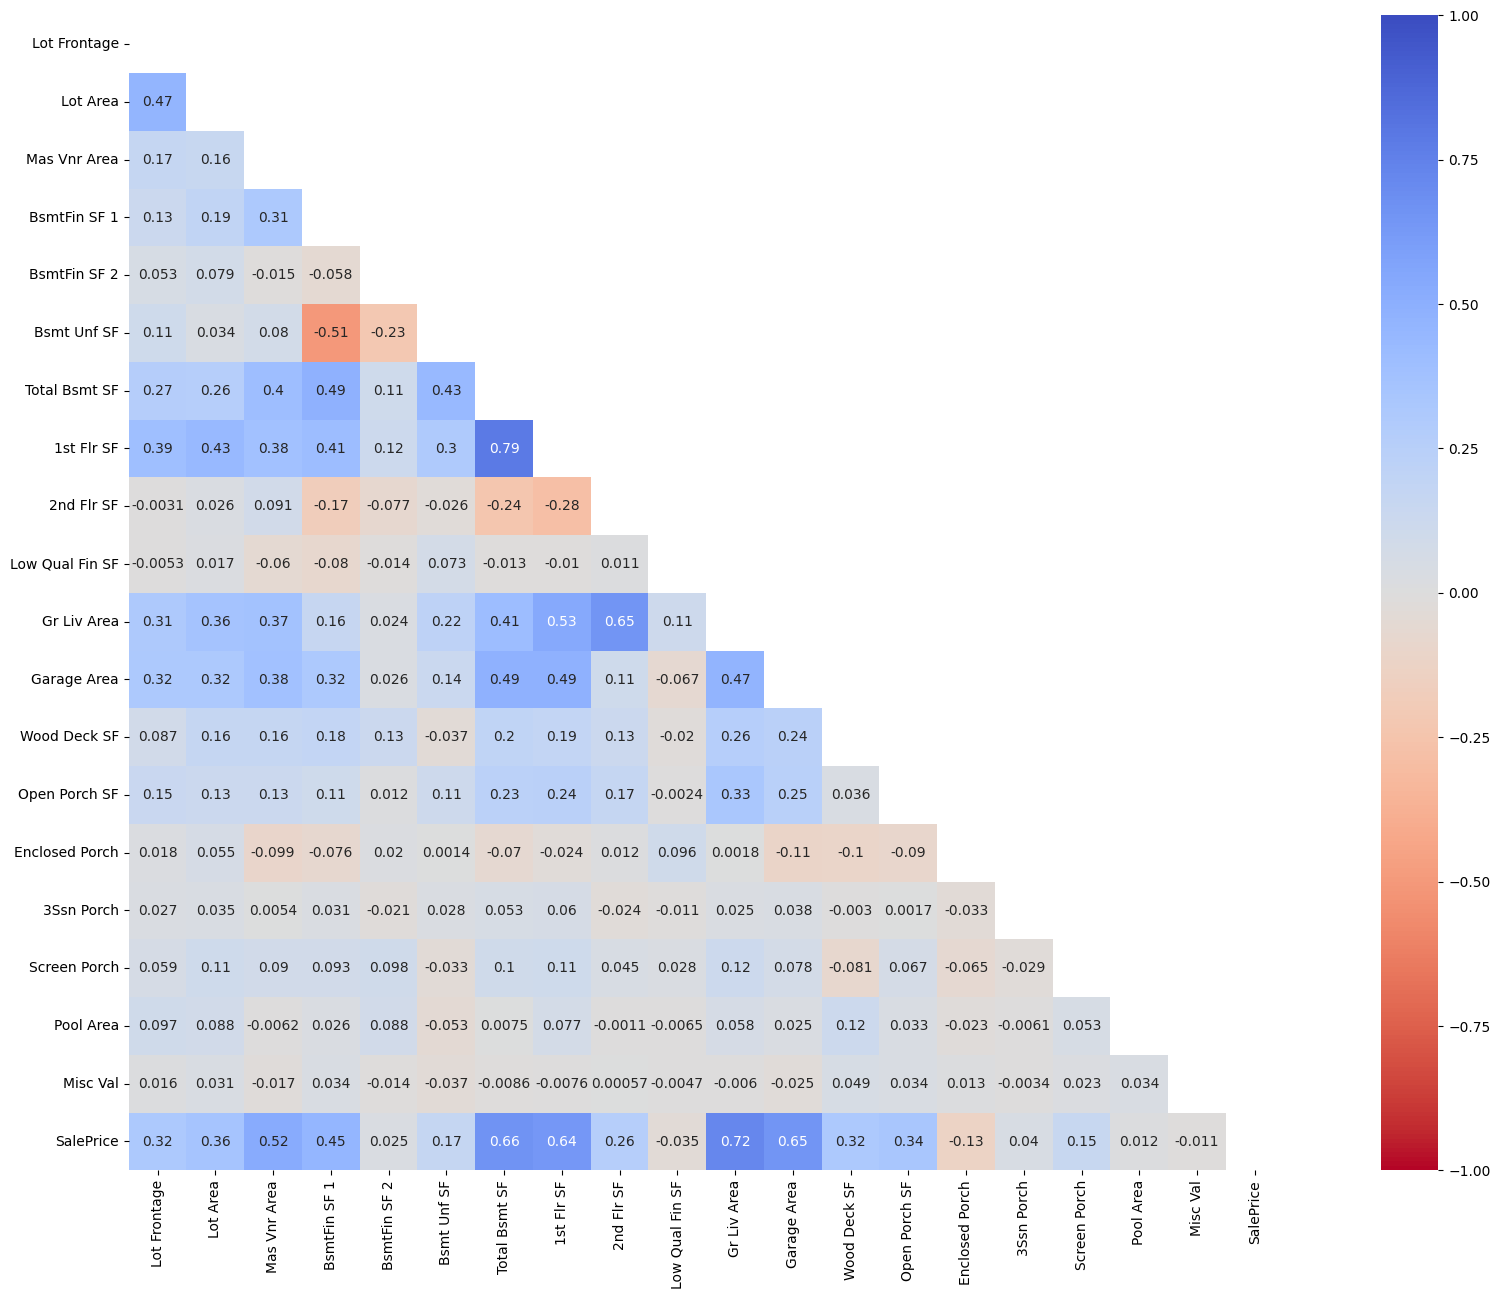

In [238]:
# Correlation matrix for numeric columns
corrmat = train[cols_numeric + ['SalePrice']].corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(25, 15))
sns.heatmap(corrmat, mask=mask, square=True, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')

In [239]:
# Selecting numeric columns that have a correlation with SalePrice > 0.4
numeric_selected = [x for x in corrmat[abs(corrmat) > 0.4]['SalePrice'].dropna().index if x not in ['SalePrice']]

<Axes: >

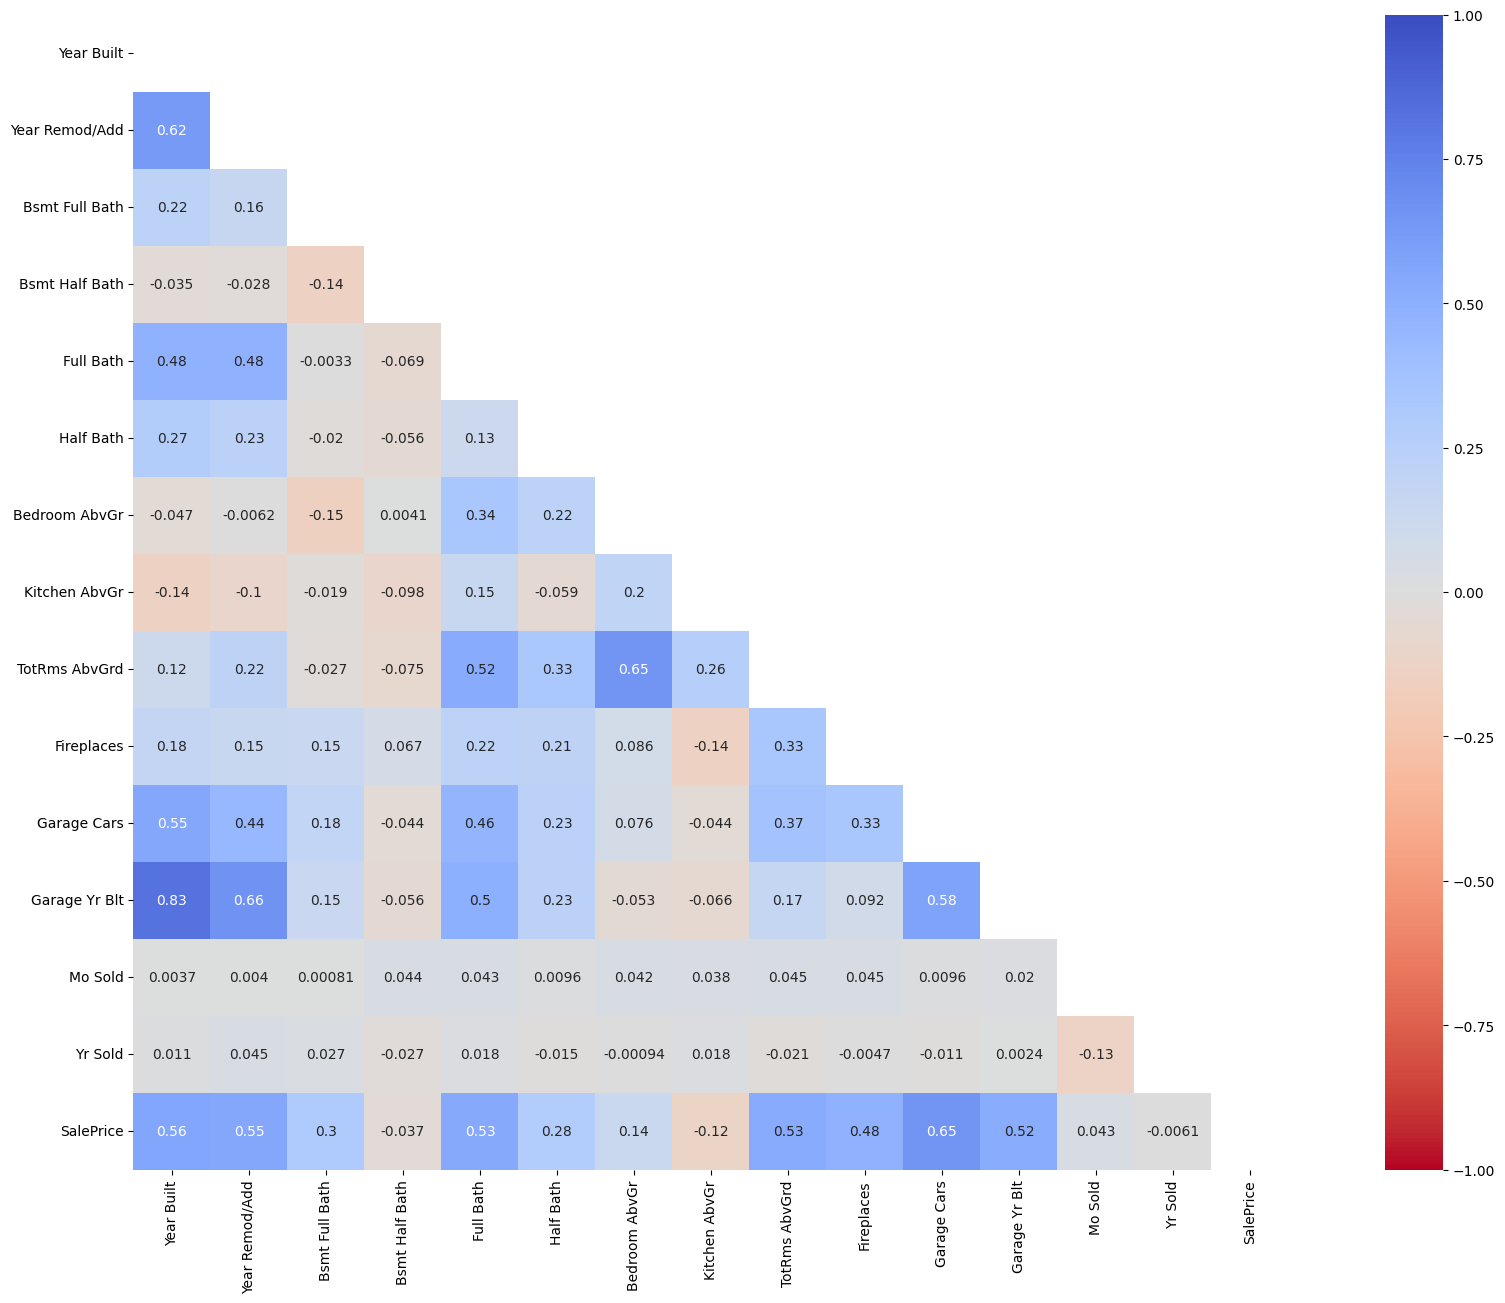

In [240]:
# Correlation matrix for discret values
corrmat = train[cols_discrete + ['SalePrice']].corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(25, 15))
sns.heatmap(corrmat, mask=mask, square=True, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')

In [241]:
# Selecting discrete columns that have a correlation with SalePrice > 0.4
discrete_selected = [x for x in corrmat[abs(corrmat) > 0.4]['SalePrice'].dropna().index if x not in ['SalePrice']]

In [242]:
# Label encoding ordinal columns
le = LabelEncoder()
for i in cols_ordinal:
    train.loc[:, i] = le.fit_transform(train.loc[:, i])
    test.loc[:, i] = le.fit_transform(test.loc[:, i])

<Axes: >

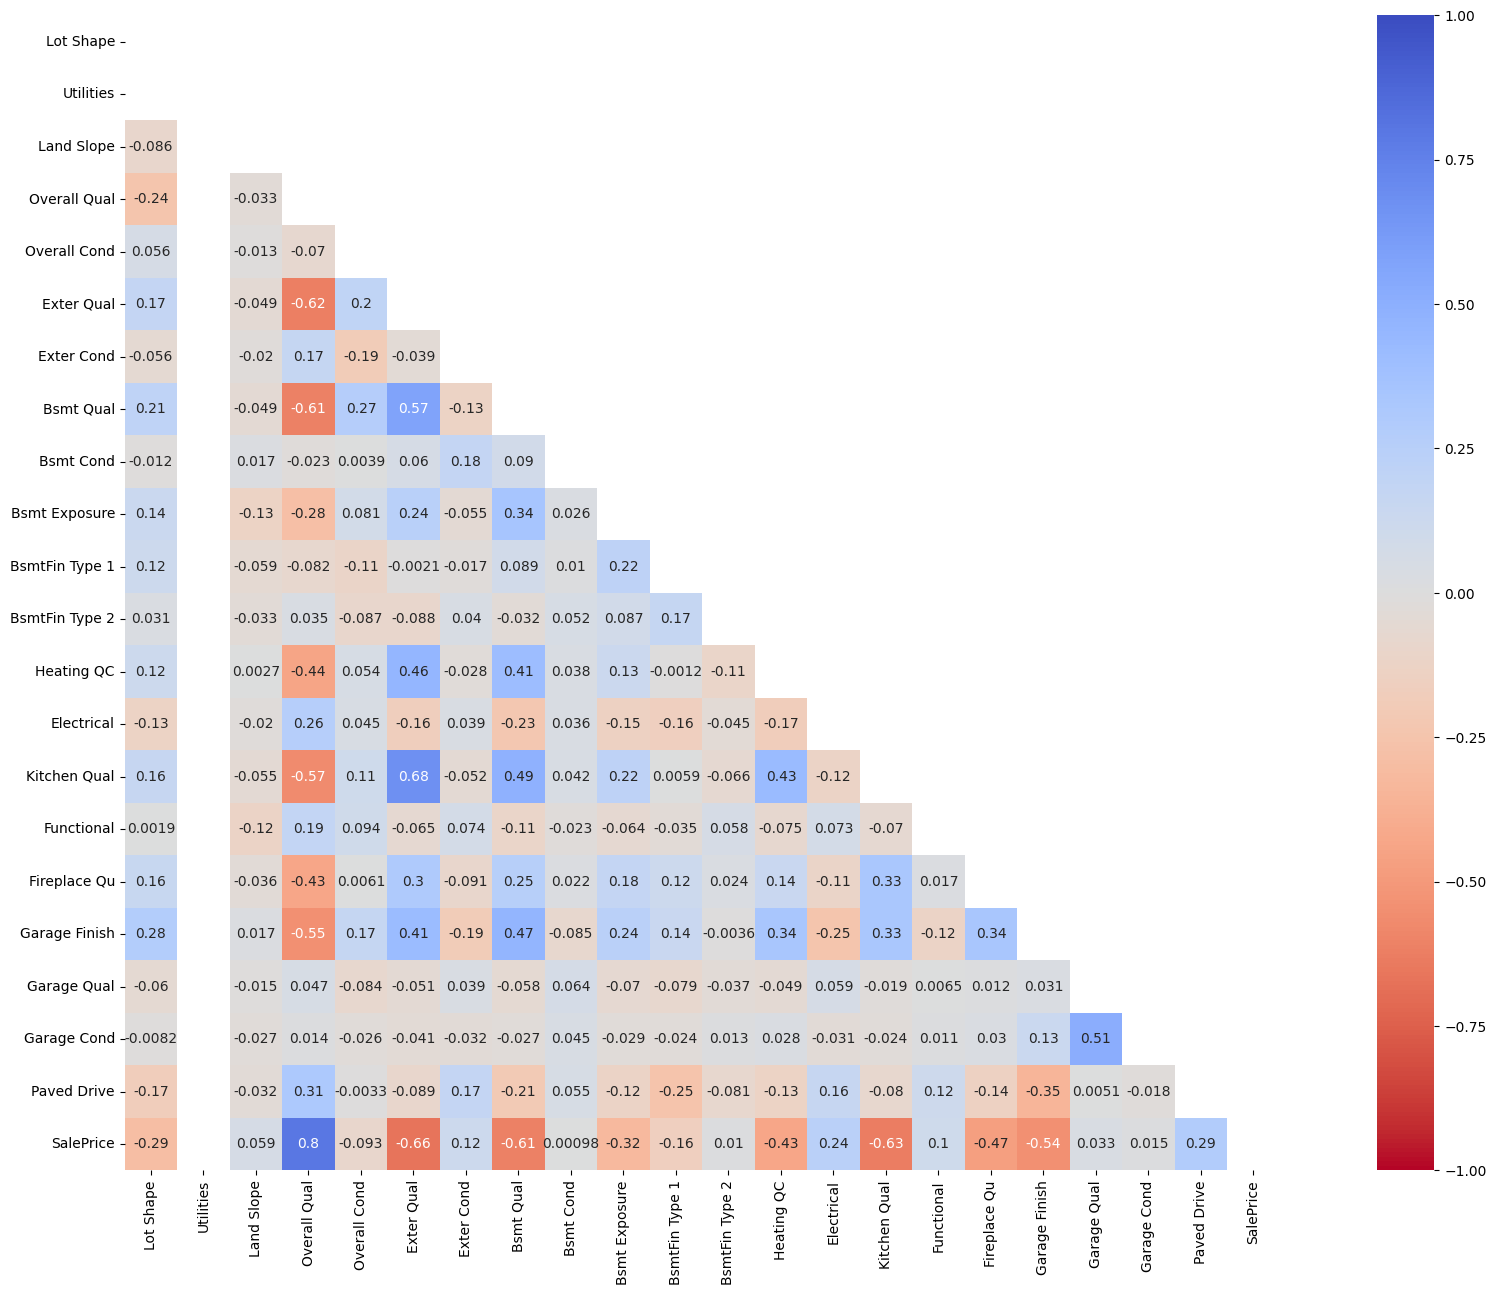

In [243]:
# Correlation matrix for ordinal values
corrmat = train[cols_ordinal + ['SalePrice']].corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(25, 15))
sns.heatmap(corrmat, mask=mask, square=True, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')

In [244]:
# Selecting discrete columns that have a correlation with SalePrice > 0.4
ordinal_selected = [x for x in corrmat[abs(corrmat) > 0.4]['SalePrice'].dropna().index if x not in ['SalePrice']]

In [245]:
# Concatenating all selected columns to a single list
cols_selected = numeric_selected + discrete_selected + ordinal_selected

In [246]:
# Checking missing values from the selected columns
train[cols_selected].isna().sum()

Mas Vnr Area       0
BsmtFin SF 1       0
Total Bsmt SF      0
1st Flr SF         0
Gr Liv Area        0
Garage Area        0
Year Built         0
Year Remod/Add     0
Full Bath          0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Yr Blt     88
Overall Qual       0
Exter Qual         0
Bsmt Qual          0
Heating QC         0
Kitchen Qual       0
Fireplace Qu       0
Garage Finish      0
dtype: int64

In [247]:
# Checking missing values in test that need to be dealt with
test[cols_selected].isna().sum() 

Mas Vnr Area       0
BsmtFin SF 1       0
Total Bsmt SF      0
1st Flr SF         0
Gr Liv Area        0
Garage Area        0
Year Built         0
Year Remod/Add     0
Full Bath          0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Yr Blt     26
Overall Qual       0
Exter Qual         0
Bsmt Qual          0
Heating QC         0
Kitchen Qual       0
Fireplace Qu       0
Garage Finish      0
dtype: int64

In [248]:
# Dropping null vals from train
# train.dropna(subset=['Garage Yr Blt'], inplace=True)

In [249]:
# Removing Garage Yr Blt
cols_selected.remove('Garage Yr Blt')

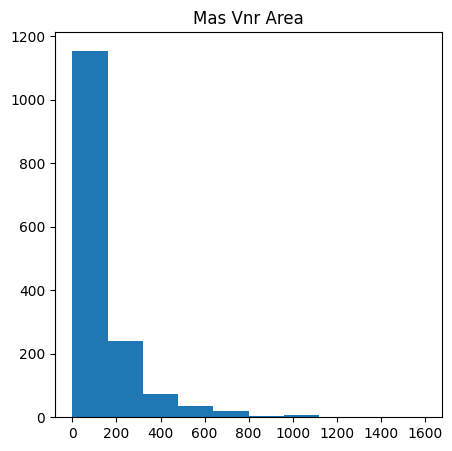

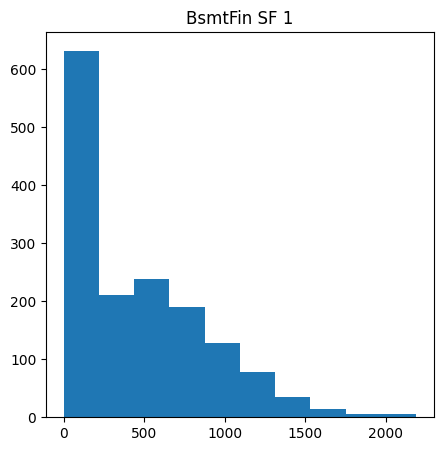

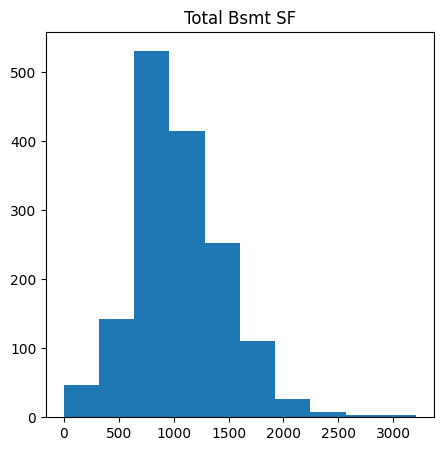

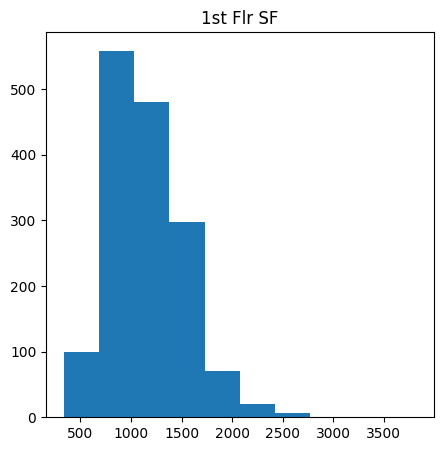

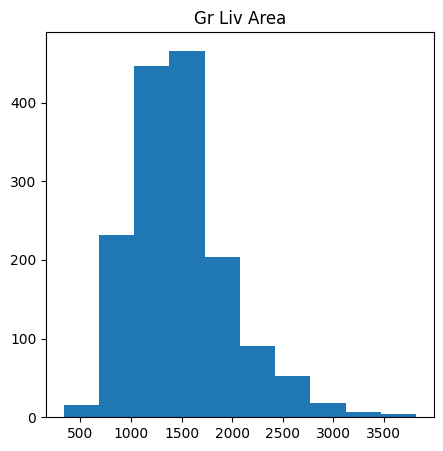

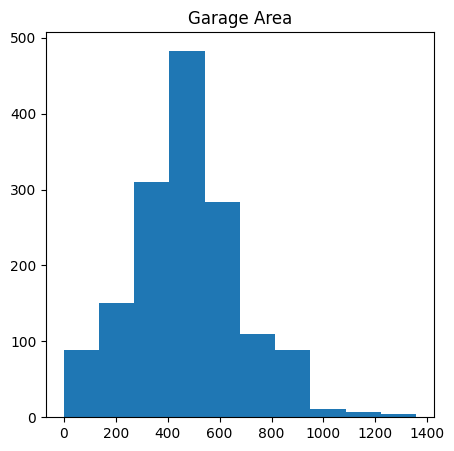

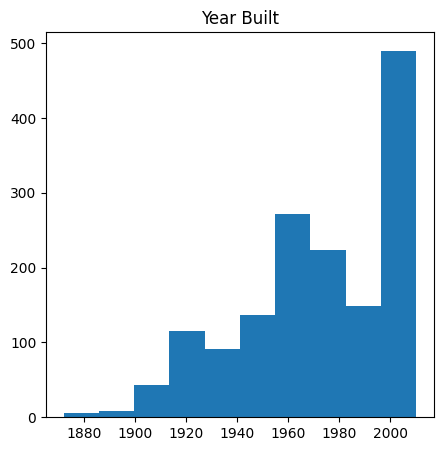

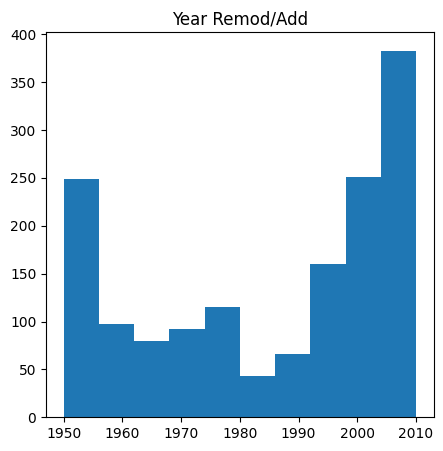

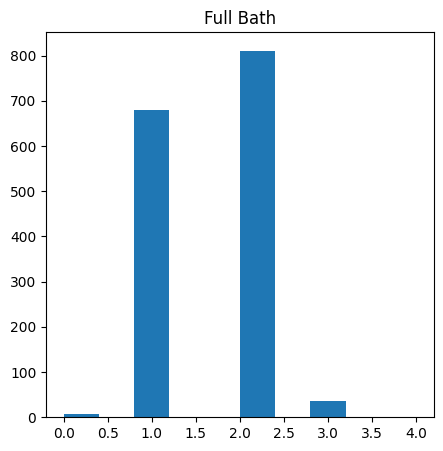

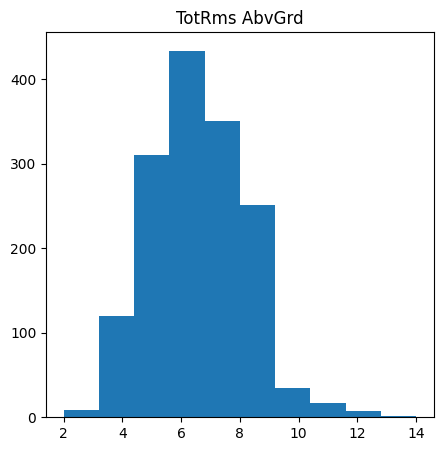

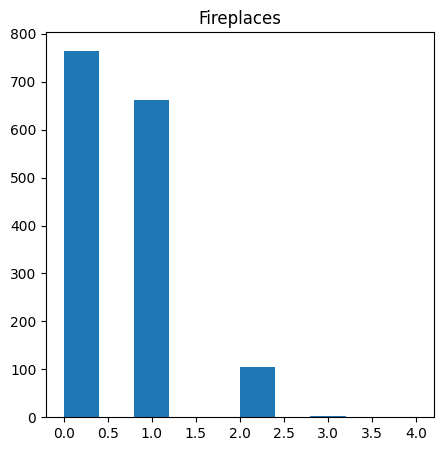

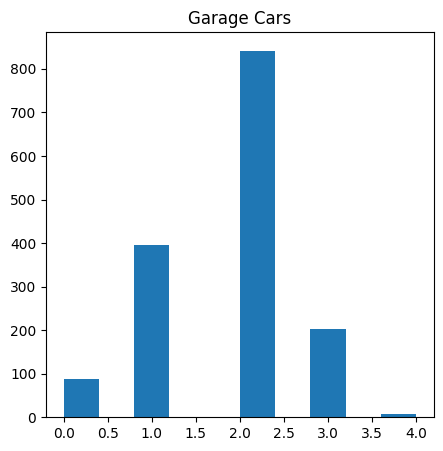

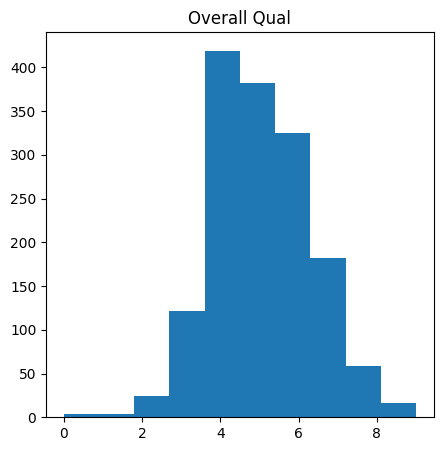

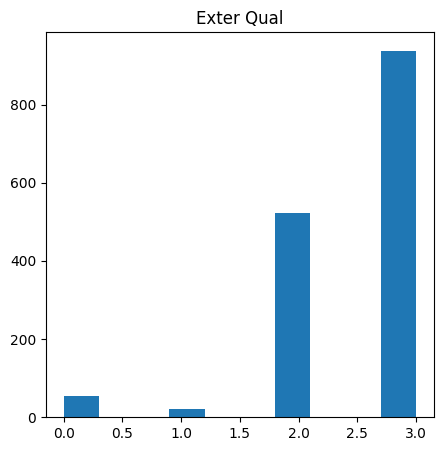

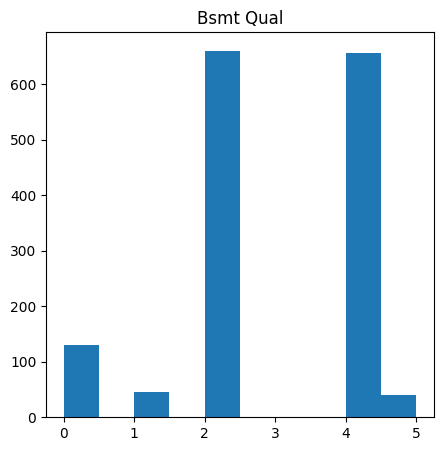

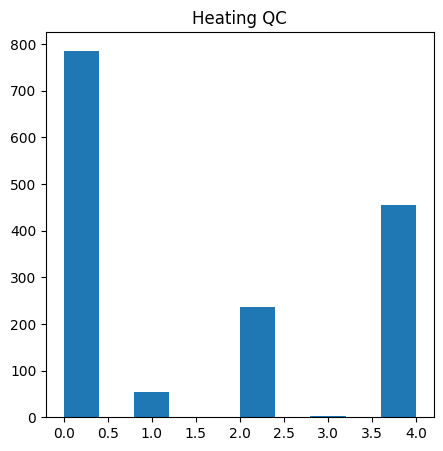

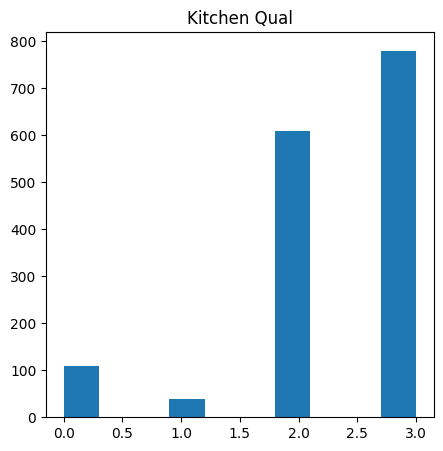

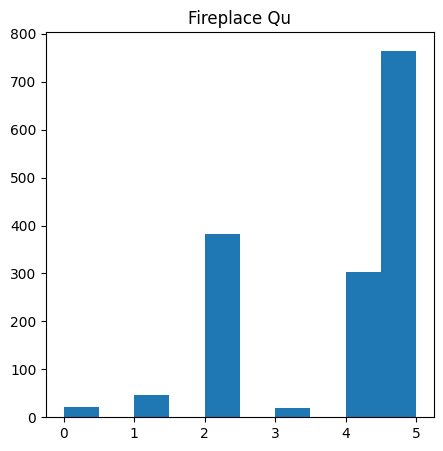

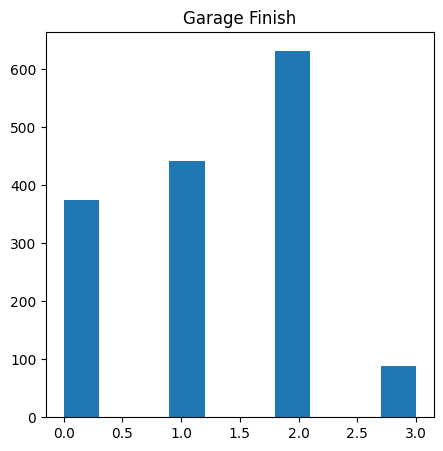

In [250]:
# Distribution of selected columns
for i in cols_selected:
    plt.figure(figsize=(5,5))
    plt.hist(train[i])
    plt.title(i)
    plt.show()

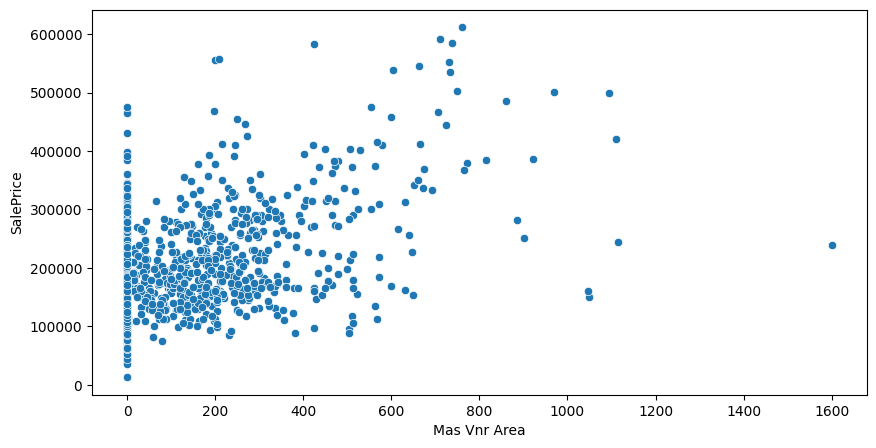

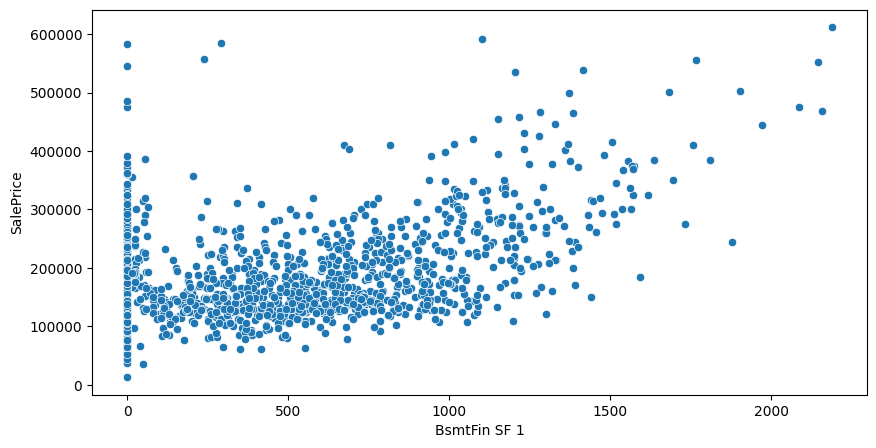

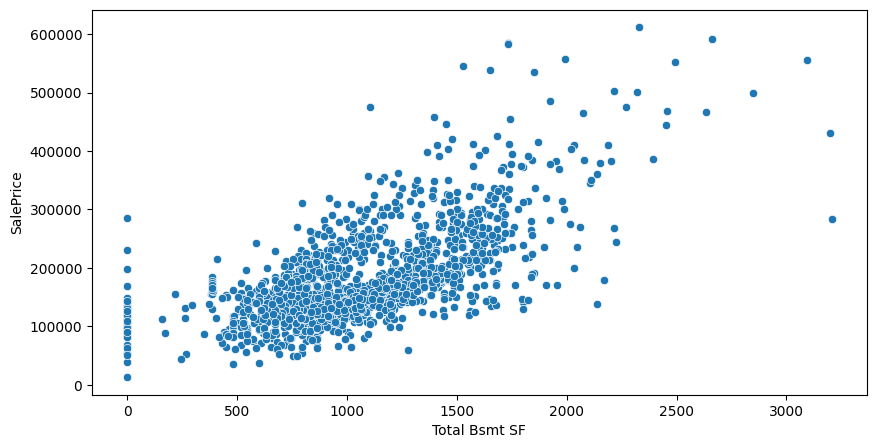

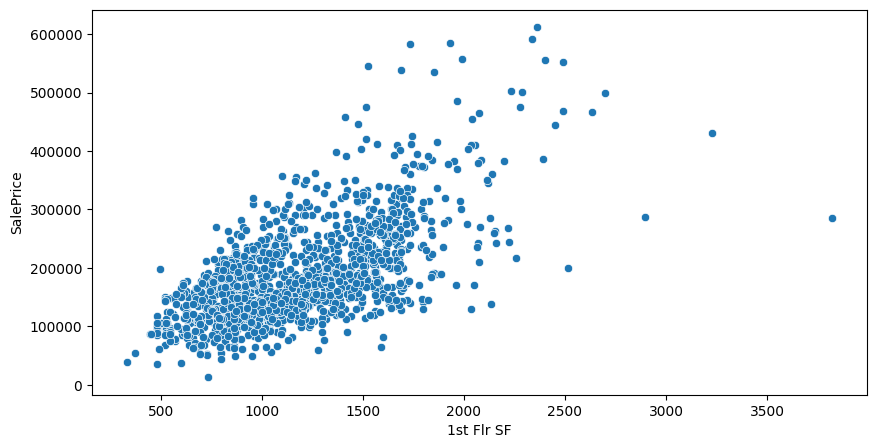

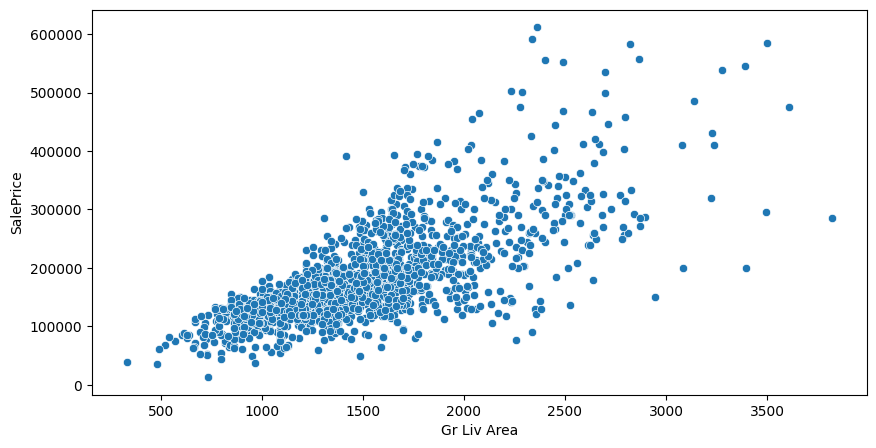

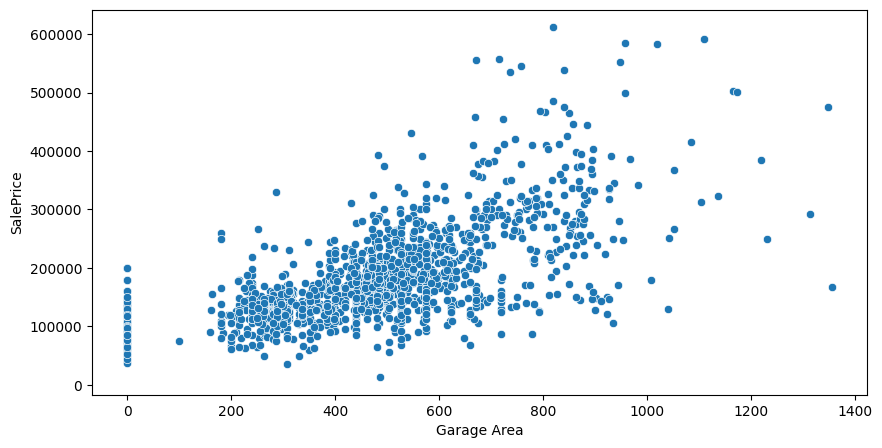

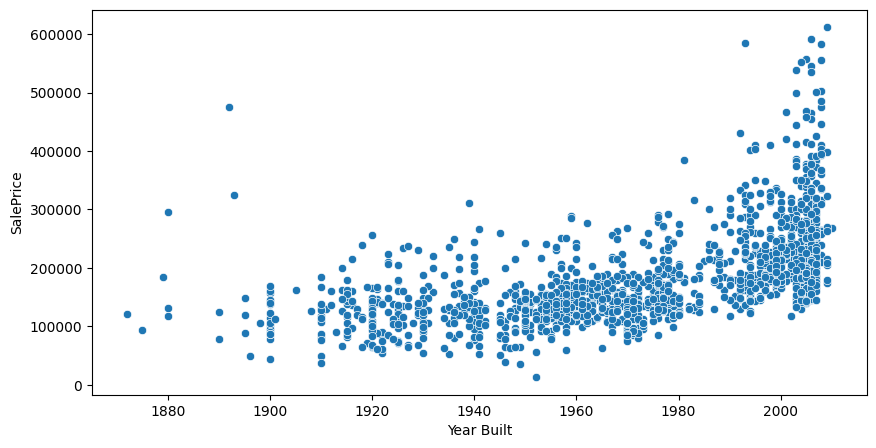

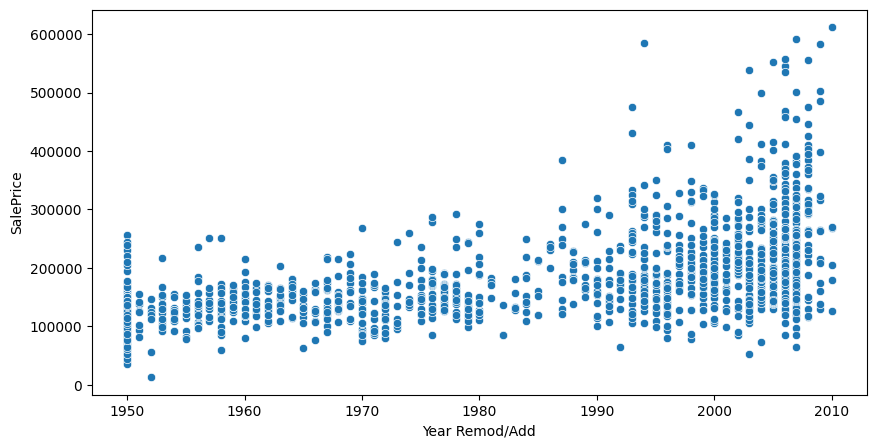

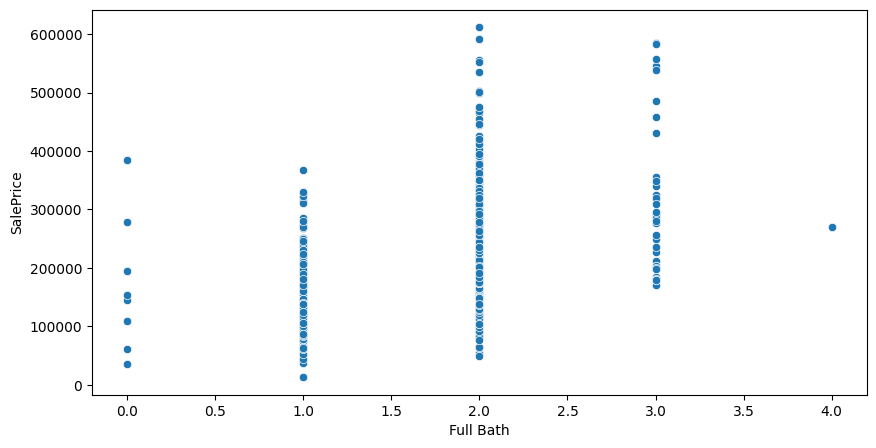

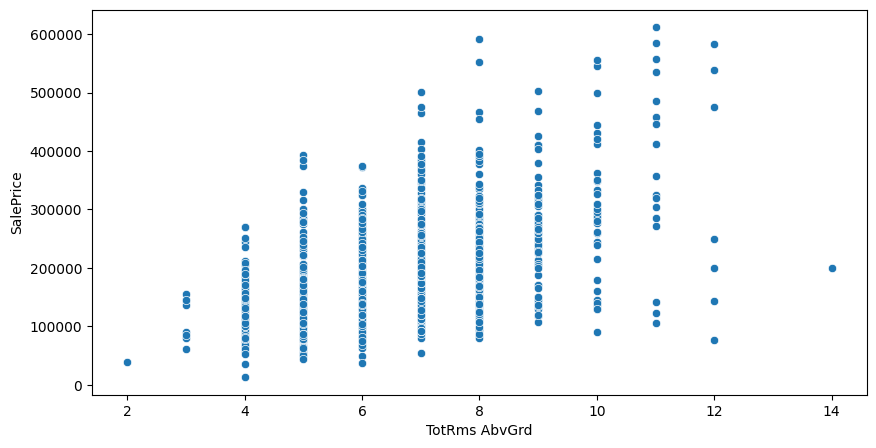

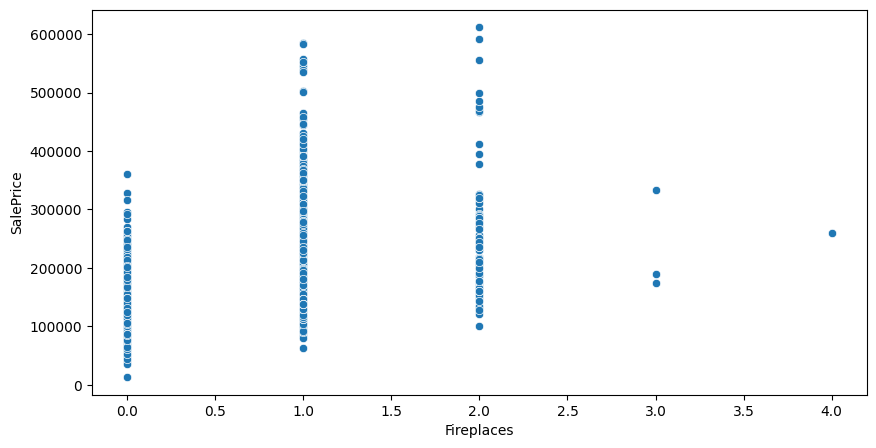

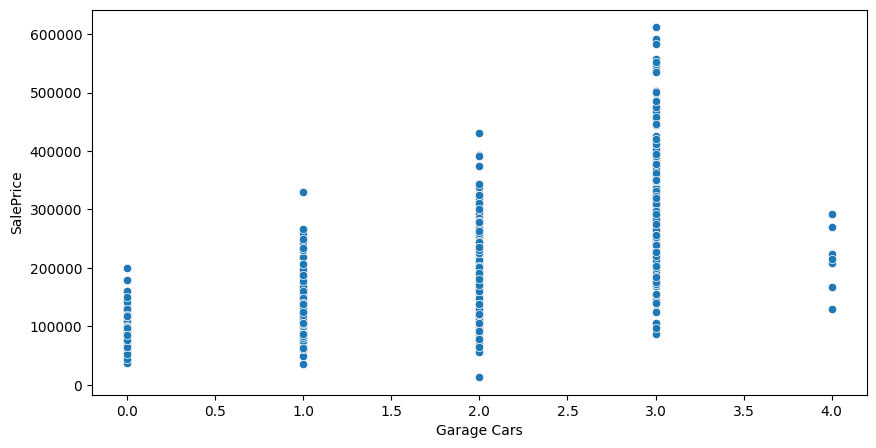

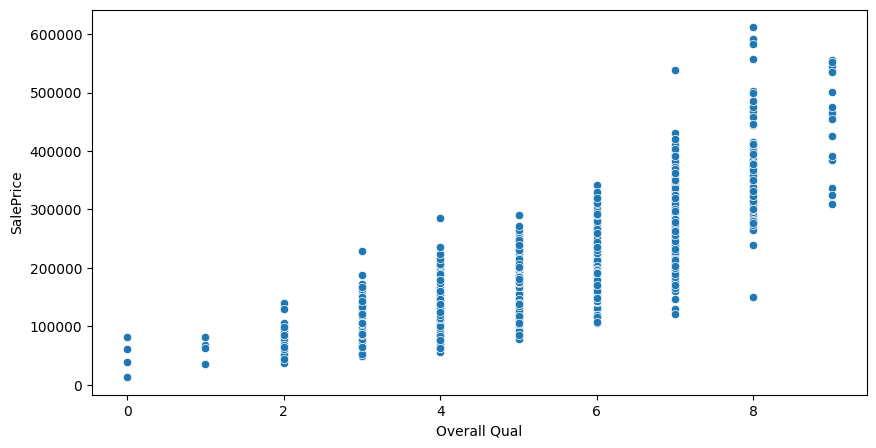

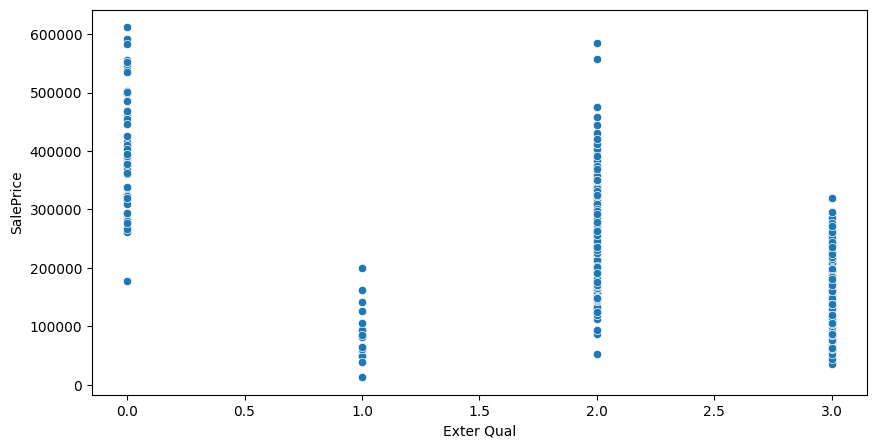

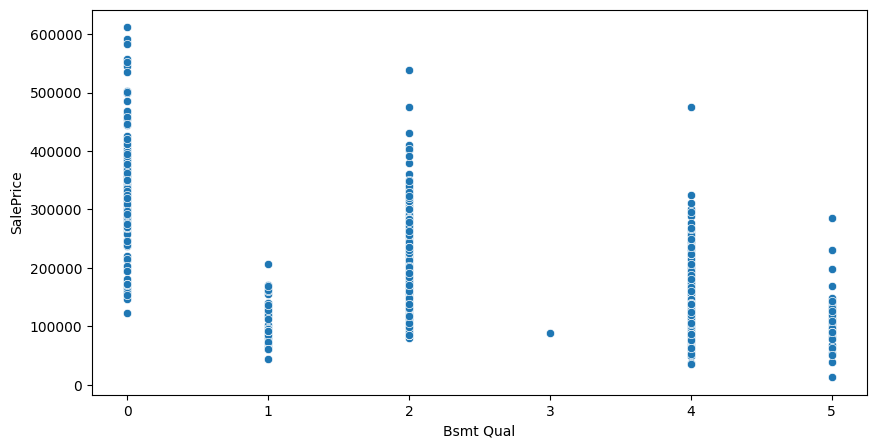

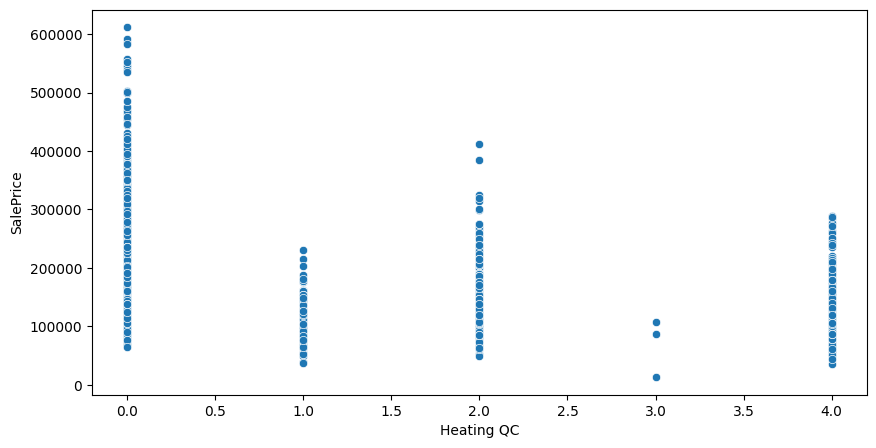

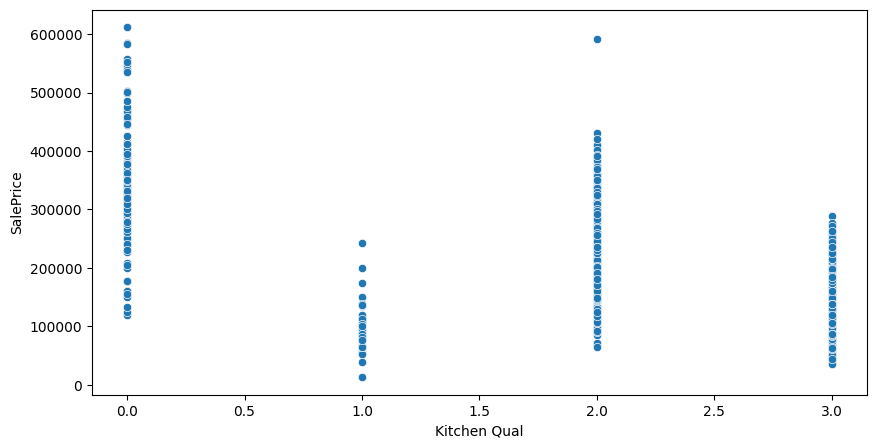

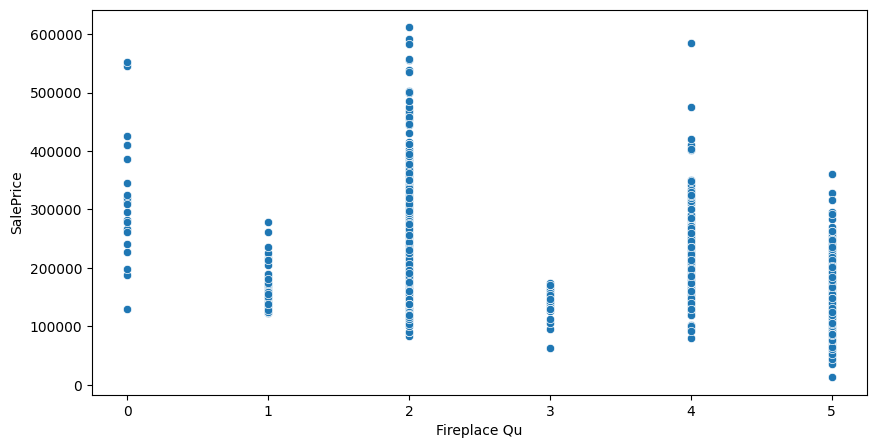

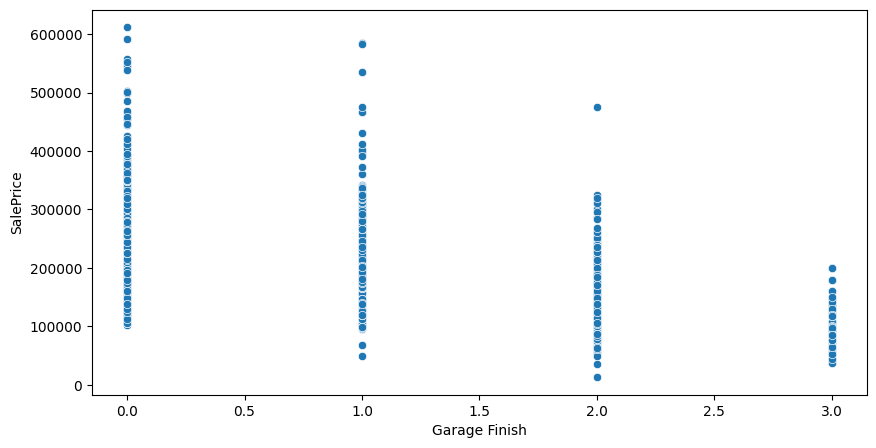

In [251]:
# Generating scatterplot between selected columns and SalePrice
for i in cols_selected:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=i, y='SalePrice', data=train)
    plt.show()

Many variables exhibit linear relationship with SalePrice, but there are also variables that have large number of 0s that skew the dataset.

In [252]:
# Grouping selected variables to use appropriate transformations
selected_discrete = [x for x in cols_selected if x in cols_discrete]
selected_numeric = [x for x in cols_selected if x in cols_numeric]
selected_ordinal = [x for x in cols_selected if x in cols_ordinal]

In [253]:
# Transforming columns
transformers = [
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', drop='first'), selected_ordinal),
    ('scaler', StandardScaler(), selected_numeric)
]
ct = ColumnTransformer(transformers, remainder='passthrough')

In [254]:
# Only scaling
scale_only = StandardScaler()

### Model 1 - Simple Linear Regression

In [255]:
# Developing simple model with Train, test and validation splits
model = LinearRegression()
X = train[cols_selected]
y = train['SalePrice']

In [256]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)

X_train_transformed = ct.fit_transform(X_train)
X_val_transformed = ct.transform(X_val)
X_test_transformed = ct.transform(X_test)

# Making predictions
y_val_preds = cross_val_predict(model, X_val_transformed, y_val)
y_test_preds = cross_val_predict(model, X_test_transformed, y_test)

# Generating RMSE of training
y_train_preds = cross_val_predict(model, X_train_transformed, y_train)
mean_squared_error(y_train_preds, y_train, squared=False)

25774.598614122937

In [257]:
# Generating RMSE of validation and testing
mean_squared_error(y_val_preds, y_val, squared=False), mean_squared_error(y_test_preds, y_test, squared=False)

(31199.384614733088, 30609.945410721557)

Model performs poorly on validation data, possible overfitting

In [258]:
# Creating model that trains on training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_transformed = ct.fit_transform(X_train)
model.fit(X_train_transformed, y_train)
y_pred = model.predict(ct.transform(X_test))
mean_squared_error(y_test, y_pred, squared=False)

28873.763121092834

In [259]:
# Baseline model
y_preds = np.full(len(X_test), y_test.mean())
mean_squared_error(y_test, y_preds, squared=False)

82701.56736627447

Our model outperforms baseline

In [122]:
# Making predictions on final test data
X = test[cols_selected]
preds = model.predict(ct.transform(X))
test['SalePrice'] = preds
test[['Unnamed: 0','SalePrice']].to_csv('../output/submission1.csv', index=False)

### How does a model with only continuous predictor variables fare?

In [260]:
# Creating train dataset with only continuous values
model = LinearRegression()
X = train[selected_numeric]
y = train['SalePrice']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [261]:
# Scaling numeric vals
X_train_scaled = scale_only.fit_transform(X_train)
X_test_scaled = scale_only.fit_transform(X_test)

# Fitting model
model.fit(X_train, y_train)

LinearRegression()

In [263]:
# Predicting on test vals
y_preds = model.predict(X_test)

In [264]:
# RMSE for test data
mean_squared_error(y_preds, y_test, squared=False)

42457.310419357884

Clearly even a primitive model with only numeric/continuous variables fares poorly compared to a primitive model with continuous and categorical variables

### Model 2 - Using Ridge with Grid Search and Polynomial Features

In [123]:
# Splitting data
X = train[cols_selected]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [124]:
# Generating parameters for polynomial features and regularisation
params = {'polys__degree': [1, 2, 3],
          'model__alpha': np.logspace(0,3)}

In [125]:
# Creating pipeline 
pipe = Pipeline([('ct', ct),
                 ('polys', PolynomialFeatures()),
                 ('model', Ridge())])

In [126]:
# Creating grid to find optimal values
grid = GridSearchCV(pipe, params, cv=5)

In [265]:
# Fitting grid
grid.fit(X_train, y_train)

In [128]:
grid.best_params_

{'model__alpha': 1000.0, 'polys__degree': 2}

In [129]:
# R2 score of grid's best parameters
grid.score(X_test, y_test)

0.8982667363782997

In [130]:
# Calculating RMSE on training data
y_train_preds = grid.predict(X_train)
mean_squared_error(y_train_preds, y_train, squared=False)

20848.12591695239

Improved RMSE compared to train data from previous

In [131]:
# Calculating RMSE on testing data
y_test_preds = grid.predict(X_test)
mean_squared_error(y_test_preds, y_test, squared=False)

26378.204381245316

Still overfitting

In [132]:
# Making prediction on Final test data
X = test[cols_selected]
preds = grid.predict(X)
test['SalePrice'] = preds
test[['Unnamed: 0','SalePrice']].to_csv('../output/submission2.csv', index=False)

### Model 3 - Using Lasso with Grid Search and Polynomial Features

In [133]:
# Splitting data
X = train[cols_selected]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [134]:
# Generating parameters for polynomial features and regularisation
params = {'polys__degree': [1, 2, 3],
          'model__alpha': np.logspace(0,3)}

In [135]:
# Creating pipeline 
pipe = Pipeline([('polys', PolynomialFeatures()),
                ('scale', StandardScaler()),
                ('model', Lasso())])

In [136]:
# Creating grid to find optimal values
grid = GridSearchCV(pipe, params, cv=5)

In [266]:
# Fitting grid
grid.fit(X_train, y_train)

In [138]:
grid.best_params_

{'model__alpha': 244.205309454865, 'polys__degree': 2}

In [139]:
# R2 score of grid's best parameters
grid.score(X_test, y_test)

0.9045438008586525

In [140]:
# Calculating RMSE on training data
y_train_preds = grid.predict(X_train)
mean_squared_error(y_train_preds, y_train, squared=False)

21743.833368339132

Ridge worked better than lasso for train but lassor seems better at test data

In [141]:
# Calculating RMSE on testing data
y_test_preds = grid.predict(X_test)
mean_squared_error(y_test_preds, y_test, squared=False)

25551.46521732855

In [69]:
# Making prediction on Final test data
X = test[cols_selected]
preds = grid.predict(X)
test['SalePrice'] = preds
test[['Unnamed: 0','SalePrice']].to_csv('../output/submission3.csv', index=False)

### Model 4 - Using entire training data with previous grid params

In [142]:
X = train[cols_selected]
y = train['SalePrice']

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [267]:
# Fitting entire train data
pipe.fit(X, y)

In [146]:
# Generating final prediction
preds = pipe.predict(test[cols_selected])
test['SalePrice'] = preds
test[['Unnamed: 0','SalePrice']].to_csv('../output/submission4.csv', index=False)

### Model 5 - Using previous grid's best parameters to train a Ridge model

In [147]:
# Generating pipeline based on best parameters from previous grid model
model = Ridge(alpha=grid.best_params_['model__alpha'])

X = train[cols_selected]
y = train['SalePrice']

poly = PolynomialFeatures(degree=grid.best_params_['polys__degree'])

pipe = Pipeline([('polys', poly),('scale', StandardScaler()), ('model', model)])
pipe.fit(X, y)

Pipeline(steps=[('polys', PolynomialFeatures()), ('scale', StandardScaler()),
                ('model', Ridge(alpha=244.205309454865))])

In [148]:
# Making predictions on entire train data
y_preds = pipe.predict(X)
mean_squared_error(y_preds, y, squared=False)

22920.337024937784

In [149]:
# Making final predictions
test['SalePrice'] = pipe.predict(test[cols_selected])
test[['Unnamed: 0','SalePrice']].to_csv('../output/submission5.csv', index=False)

### Model 6 - Removing some outliers, and developing Ridge model

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


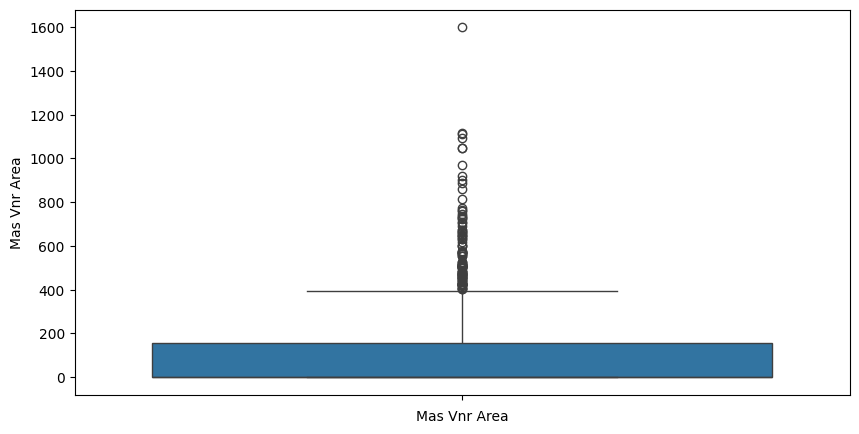

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


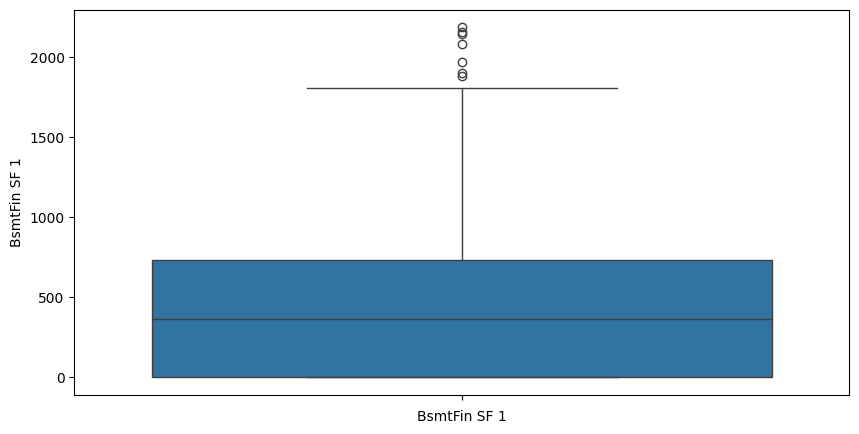

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


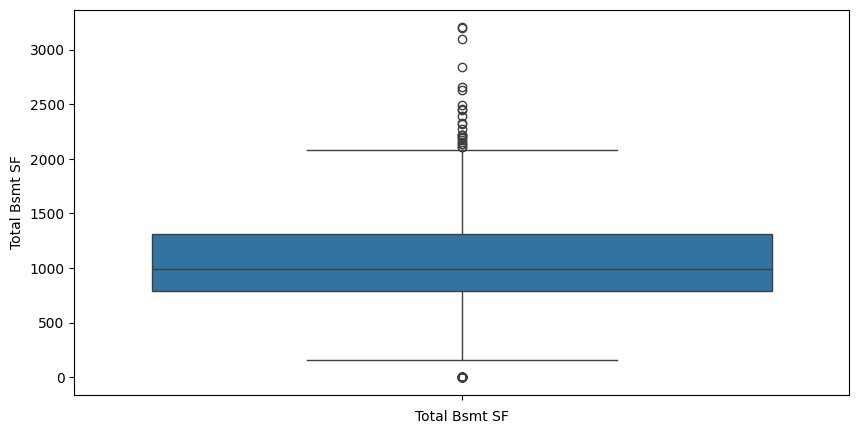

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


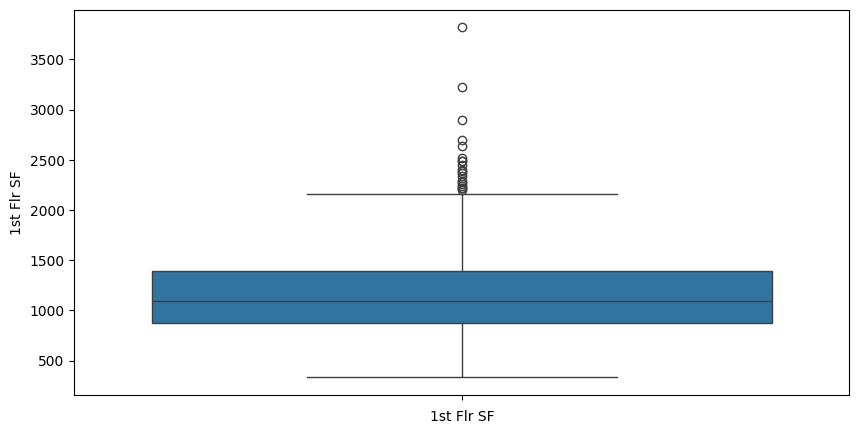

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


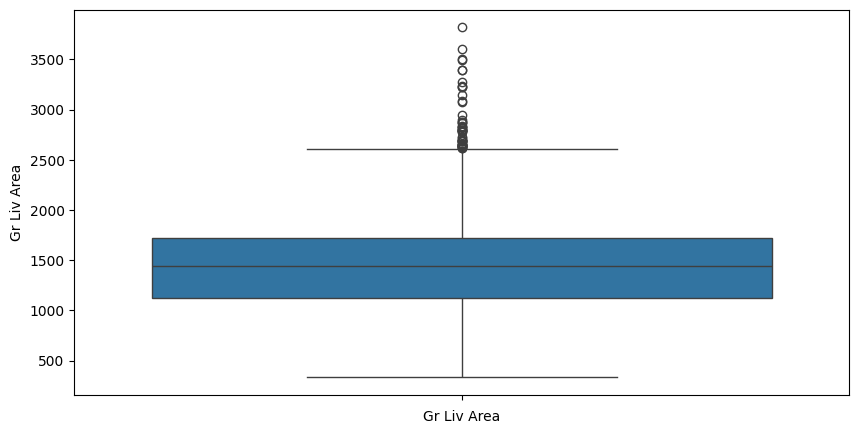

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


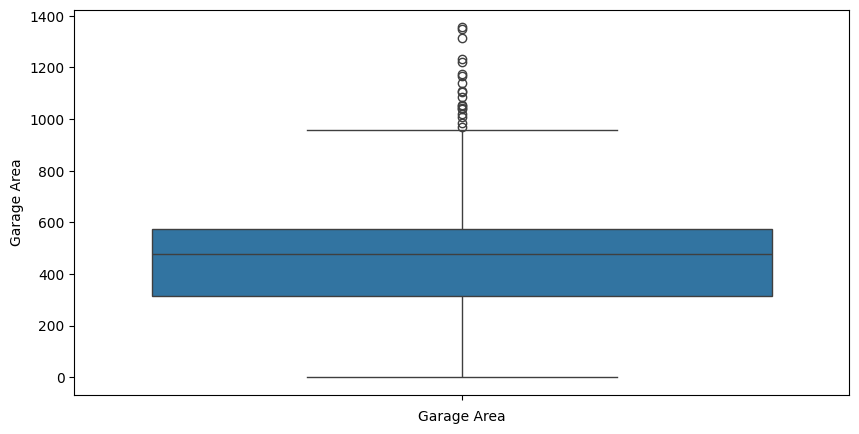

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


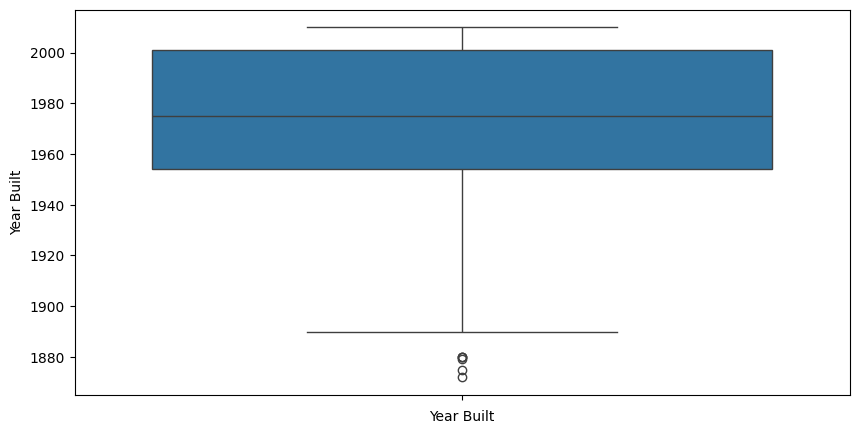

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


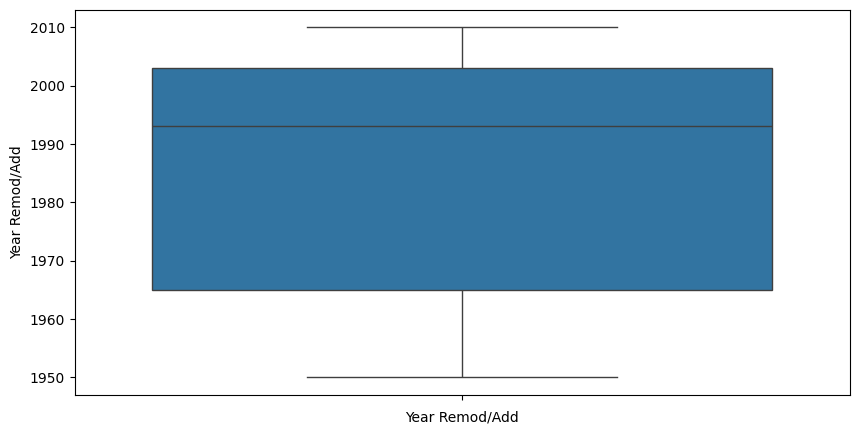

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


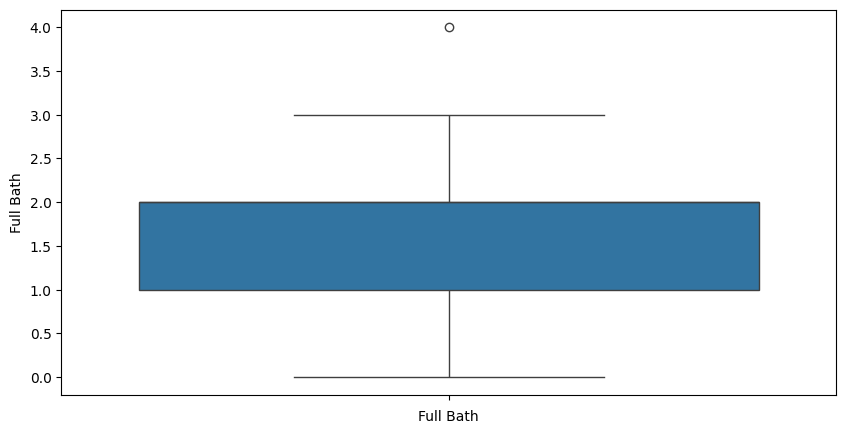

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


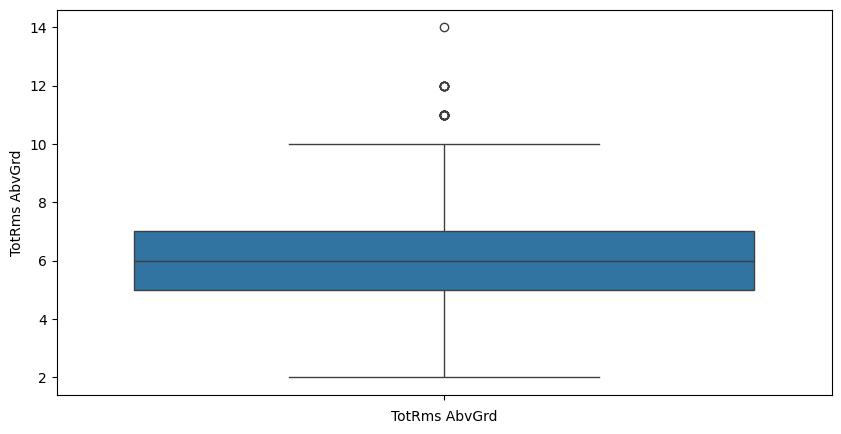

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


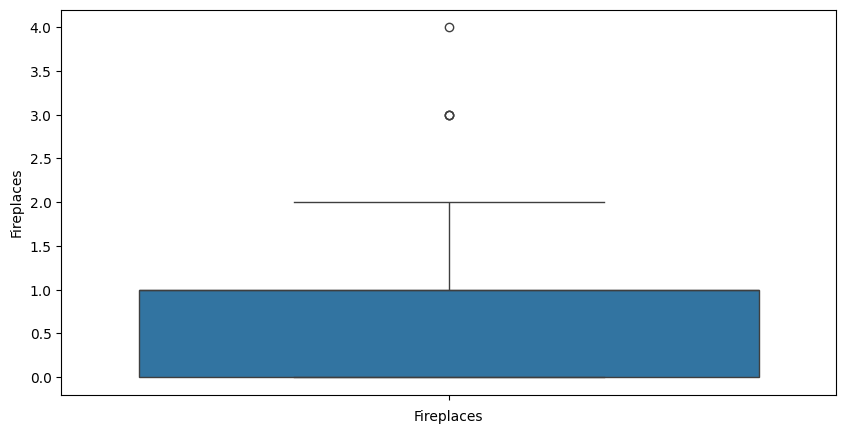

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


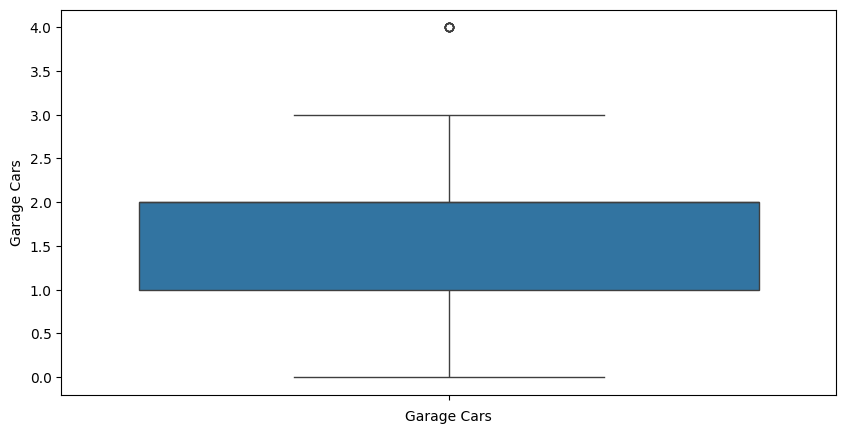

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


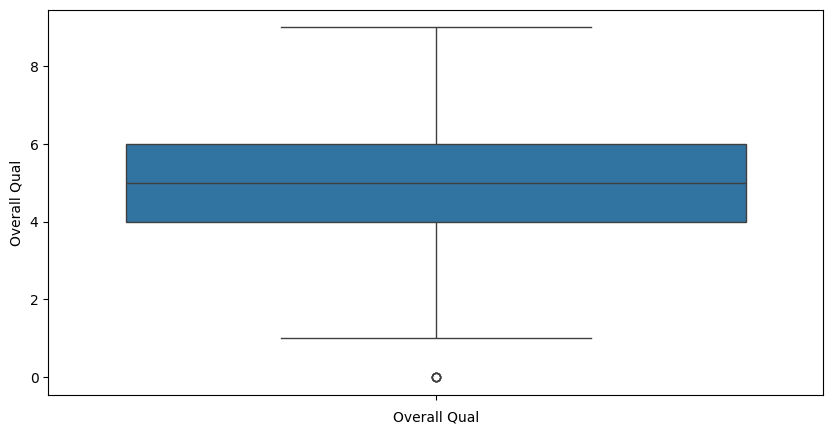

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


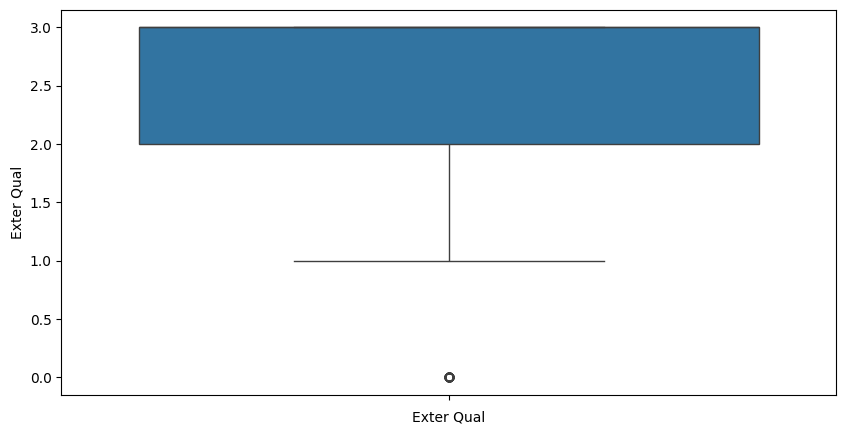

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


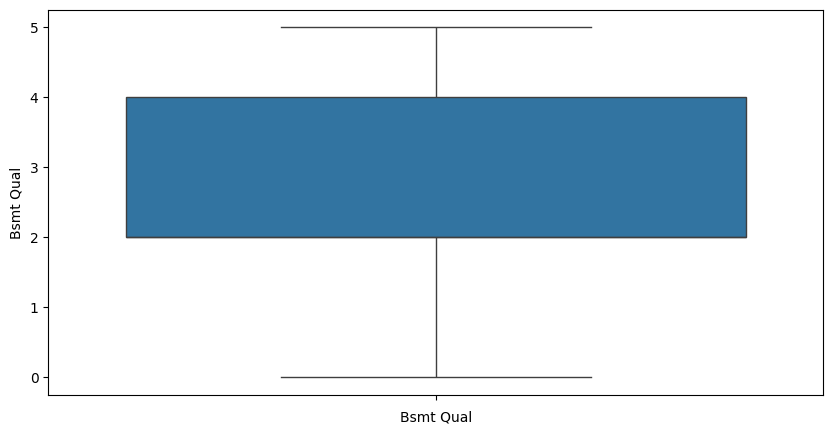

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


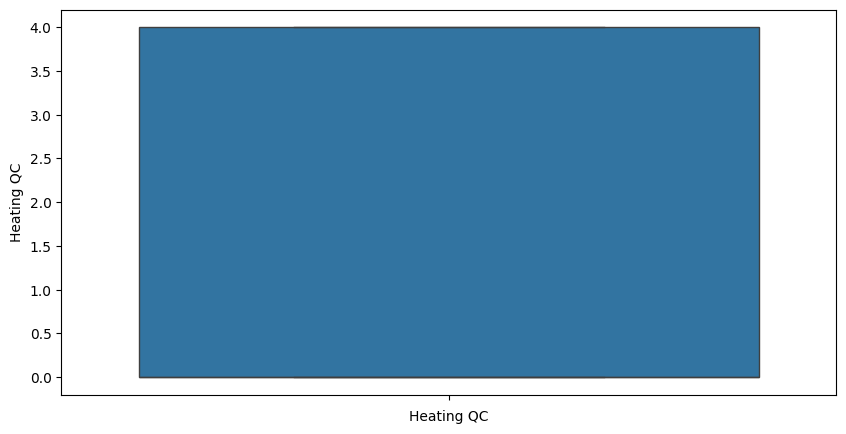

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


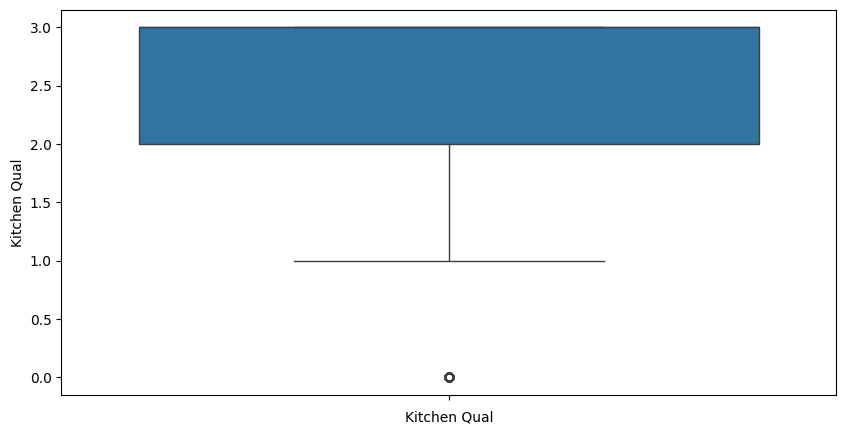

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


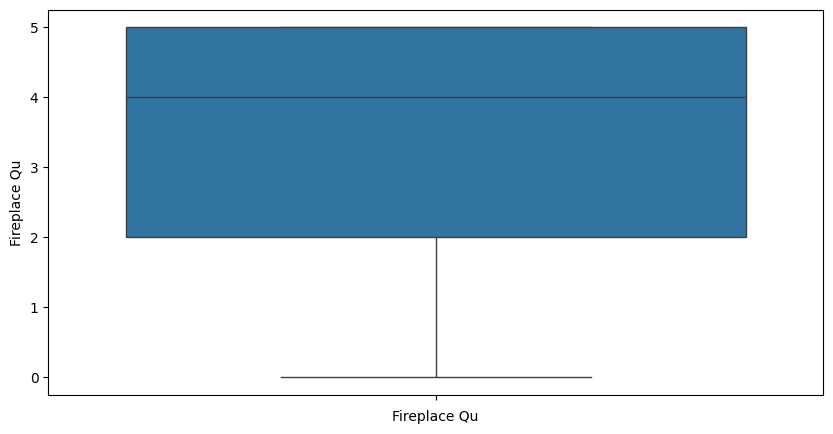

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


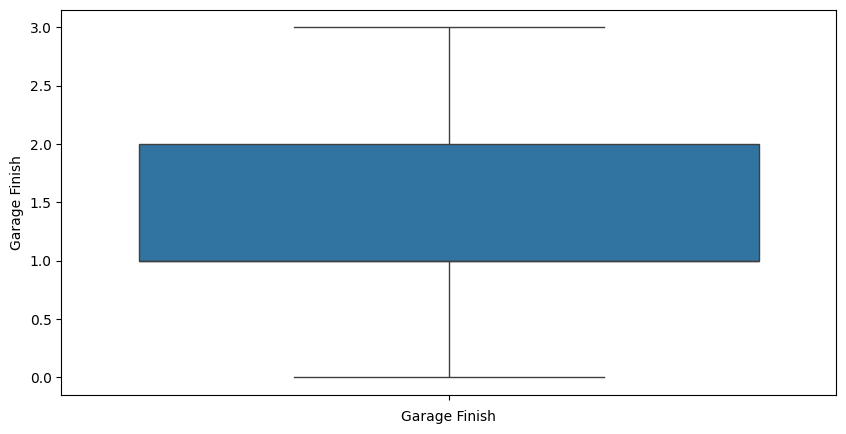

In [152]:
# Generating box plots
for i in cols_selected:
    plt.figure(figsize=(10, 5))
    sns.boxplot(train[i])
    plt.xlabel(i)
    plt.show()

In [153]:
# Filtering out outliers based on Boxplots
train_out = train[train['Total Bsmt SF'] <= 2000]

In [154]:
# Doing similar for Gr Liv Area
train_out = train_out[train_out['Gr Liv Area'] <= 2500]

In [155]:
# Making splits
X = train_out[cols_selected]
y = train_out['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [156]:
# Assigning parameters
params = {'polys__degree': [1, 2, 3],
          'model__alpha': np.logspace(1,3)}

In [157]:
# Creating model pipeline
pipe = Pipeline([('polys', PolynomialFeatures()),
                ('scale', StandardScaler()),
                ('model', Ridge())])

In [158]:
# Making grid
grid = GridSearchCV(pipe, params, cv=5)

In [159]:
# Fitting grid to training data
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polys', PolynomialFeatures()),
                                       ('scale', StandardScaler()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': array([  10.        ,   10.98541142,   12.06792641,   13.25711366,
         14.56348478,   15.9985872 ,   17.57510625,   19.30697729,
         21.20950888,   23.29951811,   25.59547923,   28.11768698,
         30.88843596,   33.93221772,   37.2759372 ,   40.94915062,
         44.98432669,...
         95.40954763,  104.81131342,  115.13953993,  126.48552169,
        138.94954944,  152.64179672,  167.68329368,  184.20699693,
        202.35896477,  222.29964825,  244.20530945,  268.26957953,
        294.70517026,  323.74575428,  355.64803062,  390.69399371,
        429.19342601,  471.48663635,  517.94746792,  568.9866029 ,
        625.05519253,  686.648845  ,  754.31200634,  828.64277285,
        910.29817799, 1000.        ]),
                         'polys__degree': [1, 2, 3]})

In [160]:
# Finding r2 score
grid.score(X_test, y_test)

0.8784353934354977

In [161]:
# Generating train RMSE
y_train_preds = grid.predict(X_train)
mean_squared_error(y_train_preds, y_train, squared=False)

17558.170449010533

In [162]:
# Generating test RMSE
y_test_preds = grid.predict(X_test)
mean_squared_error(y_test_preds, y_test, squared=False)

22507.251026111426

In [163]:
# Creating submission file
X = test[cols_selected]
preds = grid.predict(X)
test['SalePrice'] = preds
test[['Unnamed: 0','SalePrice']].to_csv('../output/submission6.csv', index=False)